## **Packages and Libraries**

In [ ]:
!pip install kneed
!pip install hdbscan
!pip install kmodes
!pip install factor_analyzer
!pip install pingouin
!pip install semopy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, t
from factor_analyzer import FactorAnalyzer
from semopy import Model
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import pingouin as pg
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
import random
from collections import defaultdict
from kmodes.util.dissim import matching_dissim
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data
df = pd.read_csv('/content/Raw Data_Paylater and Non Paylater User.csv', sep=';')
df1 = pd.read_csv('/content/Raw Data_Paylater and Non Paylater User.csv', sep=';')
df.rename(columns={'SC3 ': 'SC3', 'SC4 ': 'SC4'}, inplace=True)
df1.rename(columns={'SC3 ': 'SC3', 'SC4 ': 'SC4'}, inplace=True)
df.head()

,Gender,E-Paylater User Status,Educational Background,Year of Birth,Job Status,Monthly Income,Average monthly expenditure for online shopping in relation to monthly income,IBB1,IBB2,IBB3,...,SC1,SC2,SC3,SC4,SC5,NE1,NE2,NE3,NE4,NE5
0,2,1,3,1997,2,3,1,3,3,3,...,5,5,3,3,4,3,3,4,3,2
1,1,2,1,2002,1,2,2,3,1,2,...,4,4,2,3,4,5,5,5,5,4
2,1,1,1,2002,1,2,1,3,3,3,...,4,4,2,2,2,3,3,3,3,3
3,2,2,3,2002,1,1,1,4,4,4,...,2,4,2,2,2,1,1,1,2,1
4,1,2,3,2002,2,6,1,1,1,1,...,5,2,3,1,5,3,3,2,3,3


In [ ]:
# Show total respondents
print("Number of respondents:", df.shape[0])

Number of respondents: 810


In [ ]:
# Mapping ordinal variable to categorical variable
df['Gender'] = df['Gender'].replace({1: 'Male', 2: 'Female'})
df['E-Paylater User Status'] = df['E-Paylater User Status'].replace({1: 'Non-User', 2: 'User'})
df['Educational Background'] = df['Educational Background'].replace({1: 'Until Senior High School', 2: 'Diploma I/II/III', 3: 'Bachelor/Diploma IV', 4: 'Post Graduate'})
df['Job Status'] = df['Job Status'].replace({1: 'Students', 2: 'Working', 3: 'Not Working', 4: 'Entrepreneur'})
df['Monthly Income'] = df['Monthly Income'].replace({1: 'Less than Rp1.000.000', 2: 'Rp1.000.001 - Rp2.500.000', 3: 'Rp2.500.001 - Rp5.000.000', 4: 'Rp5.000.001 - Rp7.500.000', 5: 'Rp7.500.001 - Rp10.000.000', 6: 'More than Rp10.000.000'})
df['Average monthly expenditure for online shopping in relation to monthly income'] = df['Average monthly expenditure for online shopping in relation to monthly income'].replace({1: 'Less than 20%', 2: '21% - 40%', 3: '41% - 60%', 4: '61% - 80%', 5: '81% - 100%', 6: 'More than 100%'})

In [ ]:
# This survei is conducted in 2024
# We will generate new variable, Age, based on Year of Birth
df['Age'] = 2024 - df['Year of Birth']
df1['Age'] = 2024 - df1['Year of Birth']

In [ ]:
# Generate age group
def classify_age(age):
    if 19 <= age <= 24:
        return 'Youth (19-24)'
    elif 25 <= age <= 34:
        return 'Young Adult (25-34)'
    elif 35 <= age <= 44:
        return 'Early Middle-Age (35-44)'
    elif 45 <= age <= 54:
        return 'Late Middle-Age (45-54)'
    elif 55 <= age <= 58:
        return 'Pre-Senior (55-58)'
    else:
        return 'Out of Range'

df['Age_Group'] = df['Age'].apply(classify_age)

In [ ]:
# Show proportion for unique values in 'E-Paylater User Status'
df['E-Paylater User Status'].value_counts(normalize=True)

,proportion
E-Paylater User Status,
Non-User,0.748148
User,0.251852


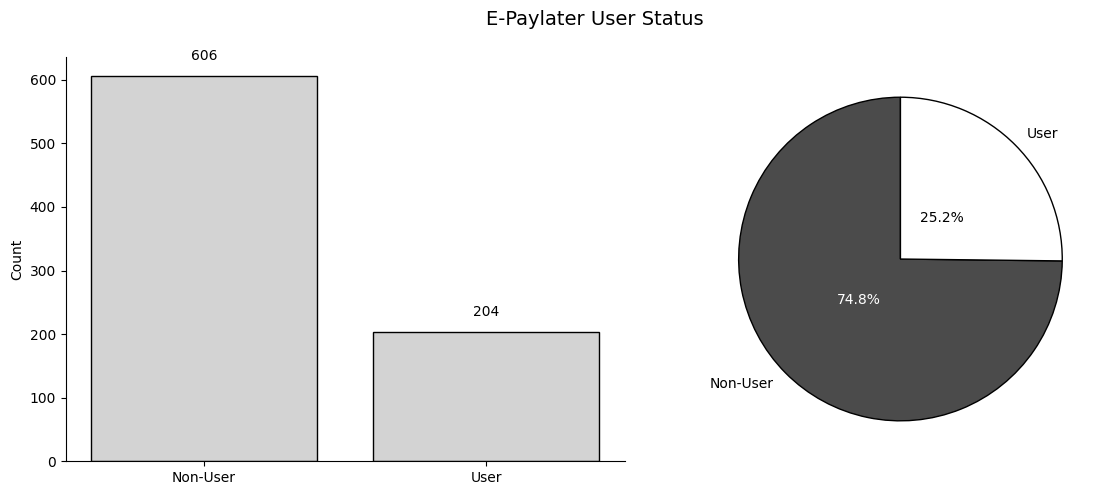

In [ ]:
# Bar and Pie Chart: E-Paylater User Status
status = df['E-Paylater User Status'].value_counts()
labels = status.index
counts = status.values
percentages = status.values / status.sum() * 100

# Set figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("E-Paylater User Status", fontsize=14)

# Bar Chart
bars = ax1.bar(labels, counts, color='lightgrey', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 20, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# ax1.set_title('Status Count')
ax1.set_ylabel('Count')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Pie Chart
colors = ['#4B4B4B', '#FFFFFF']
edge_color = 'black'

wedges, texts, autotexts = ax2.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': edge_color, 'linewidth': 1}
)

for i, autotext in enumerate(autotexts):
    if colors[i] == '#FFFFFF':
        autotext.set_color('black')
    else:
        autotext.set_color('white')
    autotext.set_position((0.6 * autotext.get_position()[0],
                           0.6 * autotext.get_position()[1]))

# ax2.legend(wedges, labels, title="Status", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

If needed, undersampling will be performed to equalize proportion of both groups.

In [ ]:
# Filter 2 groups by status
user_group = df[df['E-Paylater User Status'] == 'User']
non_user_group = df[df['E-Paylater User Status'] == 'Non-User']

# Take minimum count
n_samples = min(len(user_group), len(non_user_group))

# Perform undersampling
# user_resampled = resample(user_group, replace=False, n_samples=n_samples, random_state=42)
# non_user_resampled = resample(non_user_group, replace=False, n_samples=n_samples, random_state=42)

# Merge and randomize
# df = pd.concat([user_resampled, non_user_resampled])
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Show results
# print(df['E-Paylater User Status'].value_counts())

## **Exploration and Visualization**

In [ ]:
# Filter 2 groups by status
user_group = df[df['E-Paylater User Status'] == 'User']
non_user_group = df[df['E-Paylater User Status'] == 'Non-User']

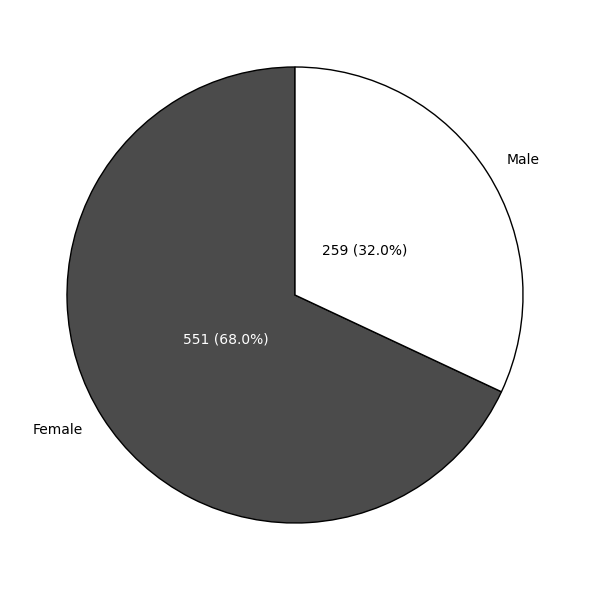

In [ ]:
# Pie Chart: Gender
gender = df['Gender'].value_counts()
labels = gender.index
counts = gender.values
percentages = counts / counts.sum() * 100
colors = ['#4B4B4B', '#FFFFFF']  # dark grey and white
edge_color = 'black'

fig, ax = plt.subplots(figsize=(6, 6))
# fig.suptitle("Gender (User)", fontsize=14)

autopcts = [f'{int(c)} ({p:.1f}%)' for c, p in zip(counts, percentages)]

wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    colors=colors,
    autopct=lambda pct: '',  # hide default
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': edge_color, 'linewidth': 1}
)

for i, autotext in enumerate(autotexts):
    autotext.set_text(autopcts[i])
    if colors[i] == '#FFFFFF':
        autotext.set_color('black')
    else:
        autotext.set_color('white')
    autotext.set_position((0.6 * autotext.get_position()[0],
                           0.6 * autotext.get_position()[1]))

# ax.legend(wedges, labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

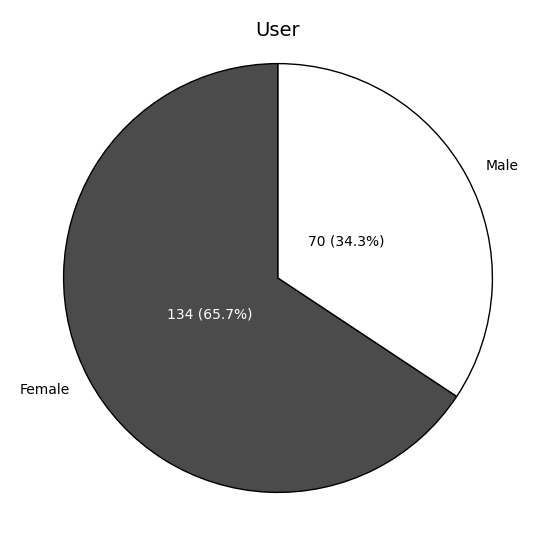

In [ ]:
# Pie Chart: Gender
gender = user_group['Gender'].value_counts()
labels = gender.index
counts = gender.values
percentages = counts / counts.sum() * 100
colors = ['#4B4B4B', '#FFFFFF']  # dark grey and white
edge_color = 'black'

fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle("User", fontsize=14, y=0.9)

autopcts = [f'{int(c)} ({p:.1f}%)' for c, p in zip(counts, percentages)]

wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    colors=colors,
    autopct=lambda pct: '',  # hide default
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': edge_color, 'linewidth': 1}
)

for i, autotext in enumerate(autotexts):
    autotext.set_text(autopcts[i])
    if colors[i] == '#FFFFFF':
        autotext.set_color('black')
    else:
        autotext.set_color('white')
    autotext.set_position((0.6 * autotext.get_position()[0],
                           0.6 * autotext.get_position()[1]))

# ax.legend(wedges, labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

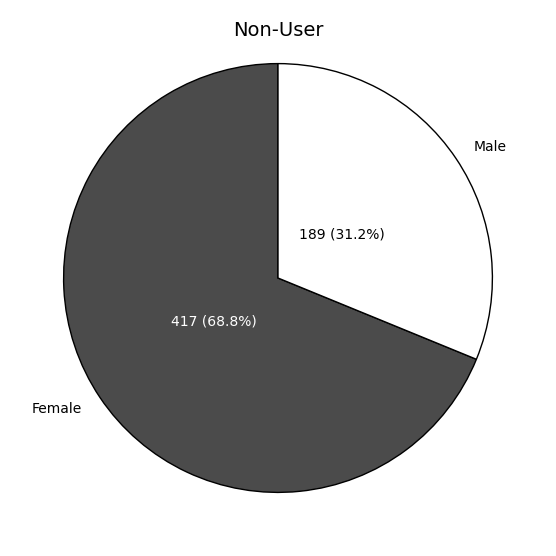

In [ ]:
# Pie Chart: Gender
gender = non_user_group['Gender'].value_counts()
labels = gender.index
counts = gender.values
percentages = counts / counts.sum() * 100
colors = ['#4B4B4B', '#FFFFFF']  # dark grey and white
edge_color = 'black'

fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle("Non-User", fontsize=14, y=0.9)

autopcts = [f'{int(c)} ({p:.1f}%)' for c, p in zip(counts, percentages)]

wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    colors=colors,
    autopct=lambda pct: '',  # hide default
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': edge_color, 'linewidth': 1}
)

for i, autotext in enumerate(autotexts):
    autotext.set_text(autopcts[i])
    if colors[i] == '#FFFFFF':
        autotext.set_color('black')
    else:
        autotext.set_color('white')
    autotext.set_position((0.6 * autotext.get_position()[0],
                           0.6 * autotext.get_position()[1]))

# ax.legend(wedges, labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

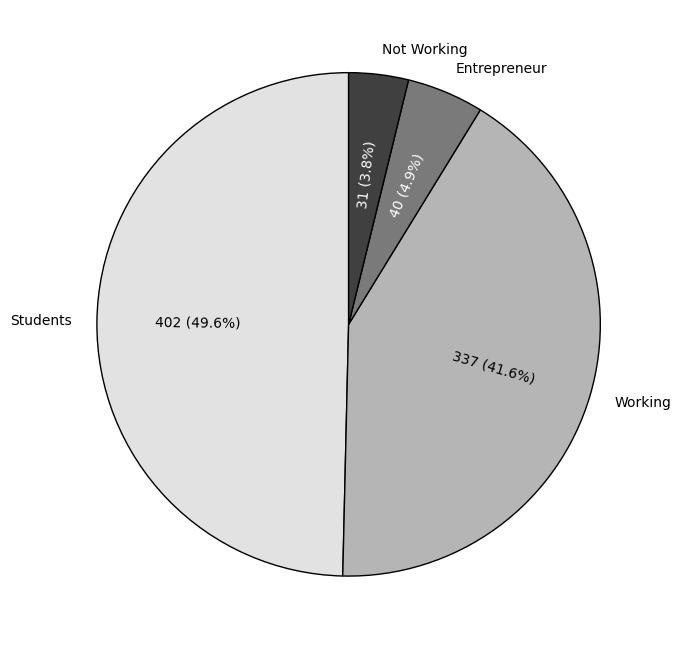

In [ ]:
# Pie Chart: Job Status
job = df['Job Status'].value_counts()
labels = job.index
counts = job.values
percentages = counts / counts.sum() * 100

n = len(labels)
colors = [cm.Greys(i / (n + 1)) for i in range(1, n + 1)]
edge_color = 'black'

fig, ax = plt.subplots(figsize=(7, 7))
# fig.suptitle("Job Status (User)", fontsize=14)

wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    colors=colors,
    autopct=None,
    wedgeprops={'edgecolor': edge_color, 'linewidth': 1},
    textprops={'fontsize': 10}
)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.radians(angle)
    x = 0.6 * np.cos(angle_rad)
    y = 0.6 * np.sin(angle_rad)

    if 90 < angle < 270:
        rotation = angle + 180
    else:
        rotation = angle

    r, g, b, _ = colors[i]
    brightness = r
    text_color = 'black' if brightness > 0.7 else 'white'

    ax.text(
        x, y,
        f'{counts[i]} ({percentages[i]:.1f}%)',
        ha='center', va='center',
        fontsize=10, color=text_color,
        rotation=rotation,
        rotation_mode='anchor'
    )

plt.tight_layout()
plt.show()

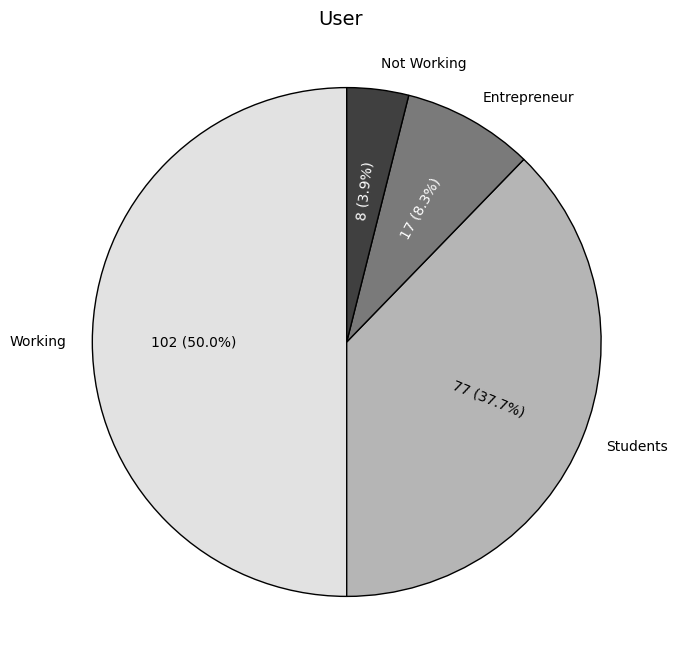

In [ ]:
# Pie Chart: Job Status
job = user_group['Job Status'].value_counts()
labels = job.index
counts = job.values
percentages = counts / counts.sum() * 100

n = len(labels)
colors = [cm.Greys(i / (n + 1)) for i in range(1, n + 1)]
edge_color = 'black'

fig, ax = plt.subplots(figsize=(7, 7))
fig.suptitle("User", fontsize=14, y=0.95)

wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    colors=colors,
    autopct=None,
    wedgeprops={'edgecolor': edge_color, 'linewidth': 1},
    textprops={'fontsize': 10}
)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.radians(angle)
    x = 0.6 * np.cos(angle_rad)
    y = 0.6 * np.sin(angle_rad)

    if 90 < angle < 270:
        rotation = angle + 180
    else:
        rotation = angle

    r, g, b, _ = colors[i]
    brightness = r
    text_color = 'black' if brightness > 0.7 else 'white'

    ax.text(
        x, y,
        f'{counts[i]} ({percentages[i]:.1f}%)',
        ha='center', va='center',
        fontsize=10, color=text_color,
        rotation=rotation,
        rotation_mode='anchor'
    )

plt.tight_layout()
plt.show()

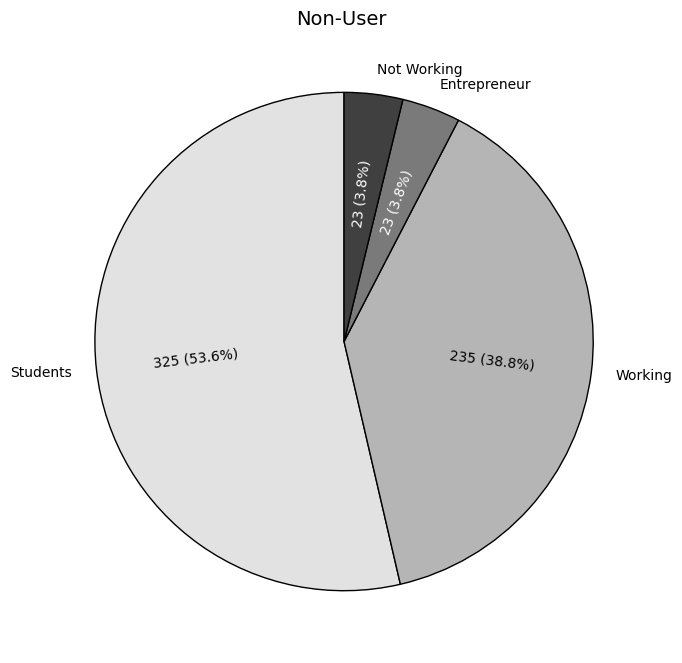

In [ ]:
# Pie Chart: Job Status
job = non_user_group['Job Status'].value_counts()
labels = job.index
counts = job.values
percentages = counts / counts.sum() * 100

n = len(labels)
colors = [cm.Greys(i / (n + 1)) for i in range(1, n + 1)]
edge_color = 'black'

fig, ax = plt.subplots(figsize=(7, 7))
fig.suptitle("Non-User", fontsize=14, y=0.95)

wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    colors=colors,
    autopct=None,
    wedgeprops={'edgecolor': edge_color, 'linewidth': 1},
    textprops={'fontsize': 10}
)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.radians(angle)
    x = 0.6 * np.cos(angle_rad)
    y = 0.6 * np.sin(angle_rad)

    if 90 < angle < 270:
        rotation = angle + 180
    else:
        rotation = angle

    r, g, b, _ = colors[i]
    brightness = r
    text_color = 'black' if brightness > 0.7 else 'white'

    ax.text(
        x, y,
        f'{counts[i]} ({percentages[i]:.1f}%)',
        ha='center', va='center',
        fontsize=10, color=text_color,
        rotation=rotation,
        rotation_mode='anchor'
    )

plt.tight_layout()
plt.show()

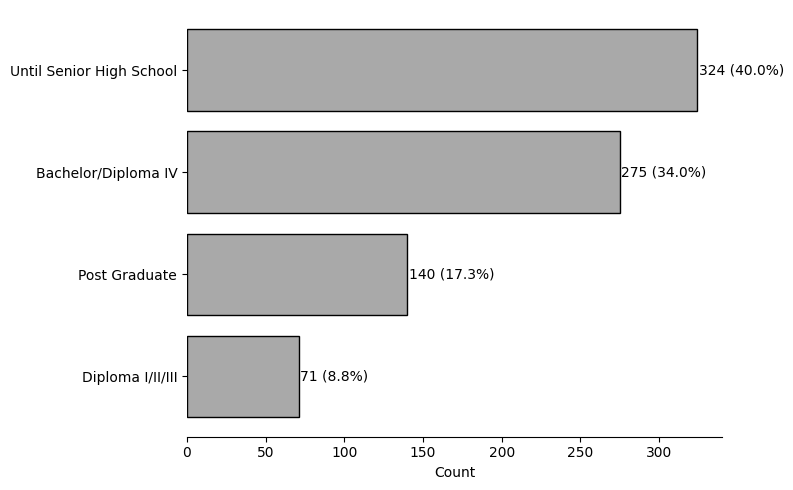

In [ ]:
# Bar and Pie Chart: Educational Background
edubg = df['Educational Background'].value_counts()
edubg = edubg.sort_values(ascending=True)
labels = edubg.index
counts = edubg.values
percentages = edubg.values / edubg.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
# fig.suptitle("User", fontsize=14, y=0.95)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

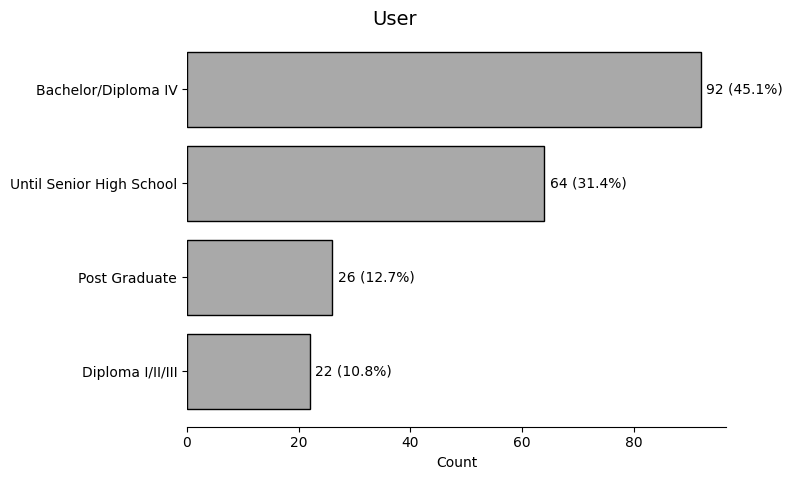

In [ ]:
# Bar and Pie Chart: Educational Background
edubg = user_group['Educational Background'].value_counts()
edubg = edubg.sort_values(ascending=True)
labels = edubg.index
counts = edubg.values
percentages = edubg.values / edubg.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("User", fontsize=14, y=0.95)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

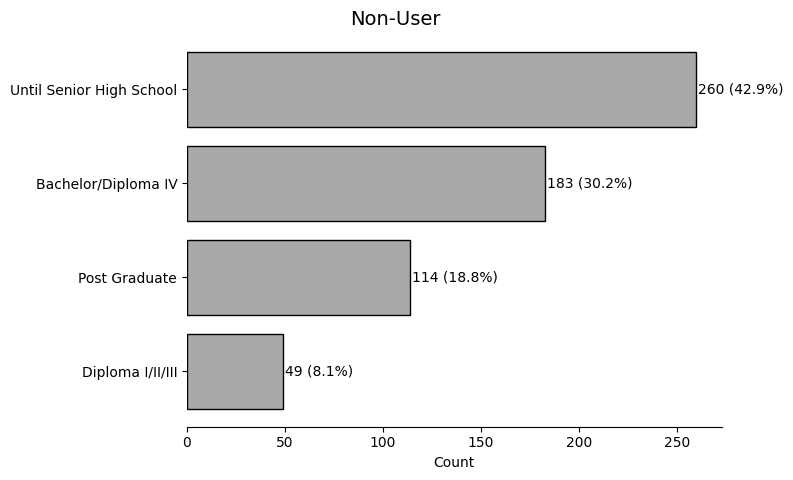

In [ ]:
# Bar and Pie Chart: Educational Background
edubg = non_user_group['Educational Background'].value_counts()
edubg = edubg.sort_values(ascending=True)
labels = edubg.index
counts = edubg.values
percentages = edubg.values / edubg.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("Non-User", fontsize=14, y=0.95)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

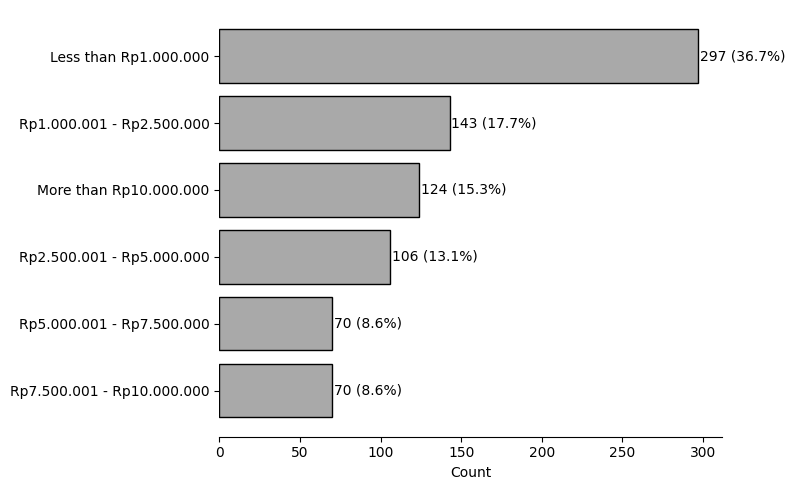

In [ ]:
# Bar and Pie Chart: Monthly Income
income = df['Monthly Income'].value_counts()
income = income.sort_values(ascending=True)
labels = income.index
counts = income.values
percentages = income.values / income.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
# fig.suptitle("Monthly Income (User)", fontsize=14)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

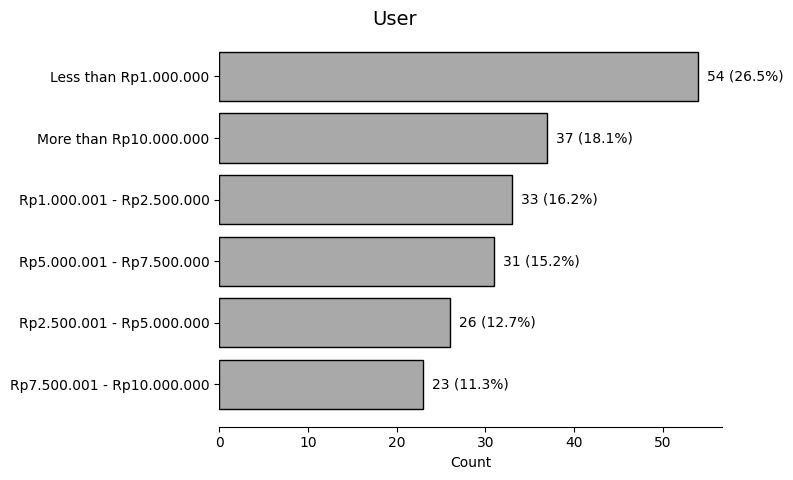

In [ ]:
# Bar and Pie Chart: Monthly Income
income = user_group['Monthly Income'].value_counts()
income = income.sort_values(ascending=True)
labels = income.index
counts = income.values
percentages = income.values / income.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("User", fontsize=14, y=0.95)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

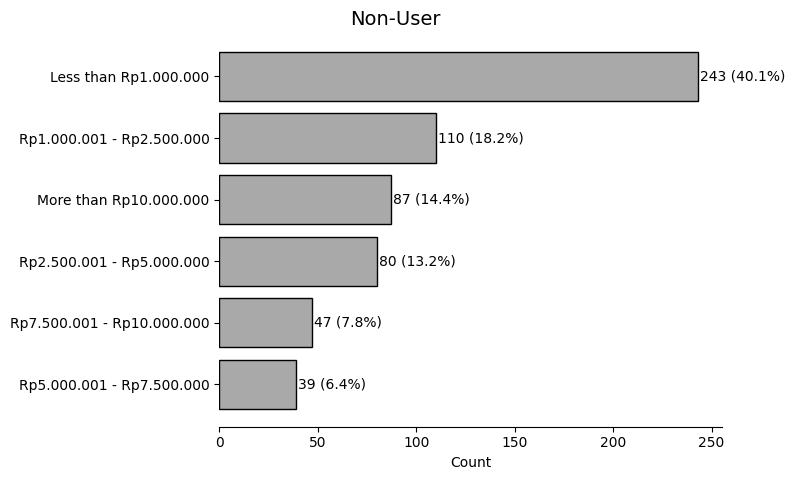

In [ ]:
# Bar and Pie Chart: Monthly Income
income = non_user_group['Monthly Income'].value_counts()
income = income.sort_values(ascending=True)
labels = income.index
counts = income.values
percentages = income.values / income.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("Non-User", fontsize=14, y=0.95)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

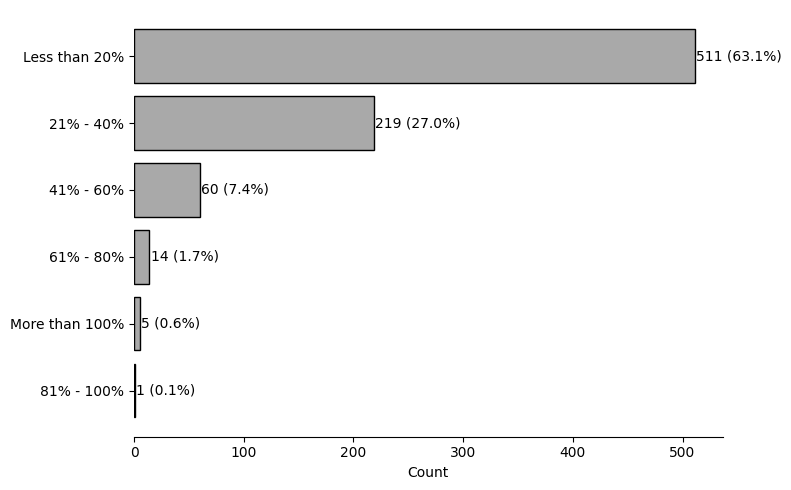

In [ ]:
# Bar and Pie Chart: Average monthly expenditure for online shopping in relation to monthly income
spending = df['Average monthly expenditure for online shopping in relation to monthly income'].value_counts()
spending = spending.sort_values(ascending=True)
labels = spending.index
counts = spending.values
percentages = spending.values / spending.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
# fig.suptitle("Average monthly expenditure for online shopping in relation to monthly income", fontsize=14)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

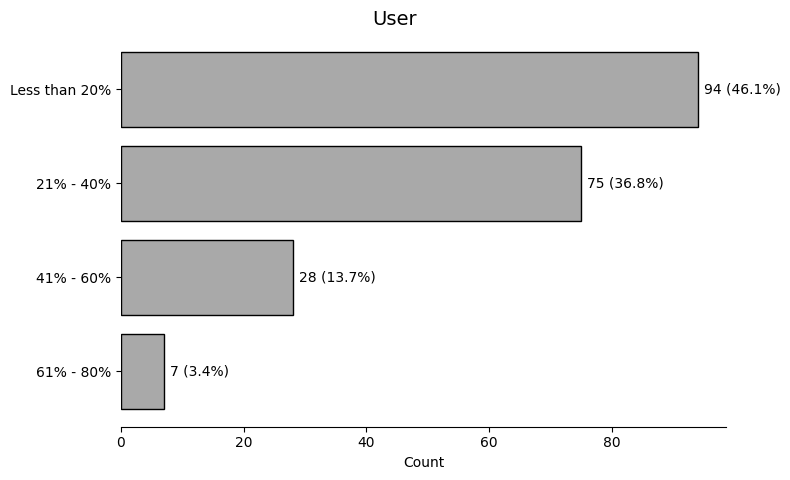

In [ ]:
# Bar and Pie Chart: Average monthly expenditure for online shopping in relation to monthly income
spending = user_group['Average monthly expenditure for online shopping in relation to monthly income'].value_counts()
spending = spending.sort_values(ascending=True)
labels = spending.index
counts = spending.values
percentages = spending.values / spending.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("User", fontsize=14, y=0.95)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

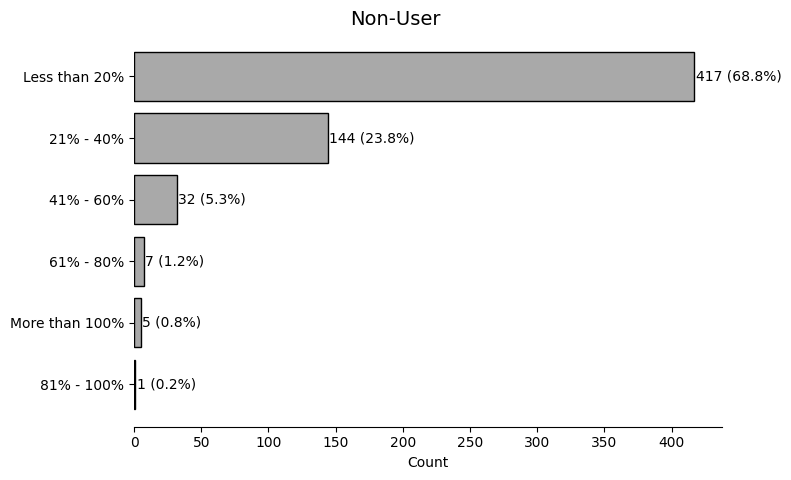

In [ ]:
# Bar and Pie Chart: Average monthly expenditure for online shopping in relation to monthly income
spending = non_user_group['Average monthly expenditure for online shopping in relation to monthly income'].value_counts()
spending = spending.sort_values(ascending=True)
labels = spending.index
counts = spending.values
percentages = spending.values / spending.sum() * 100

# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("Non-User", fontsize=14, y=0.95)

# Horizontal Bar Chart
bars = ax.barh(labels, counts, color='darkgrey', edgecolor='black')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{counts[i]} ({percentages[i]:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

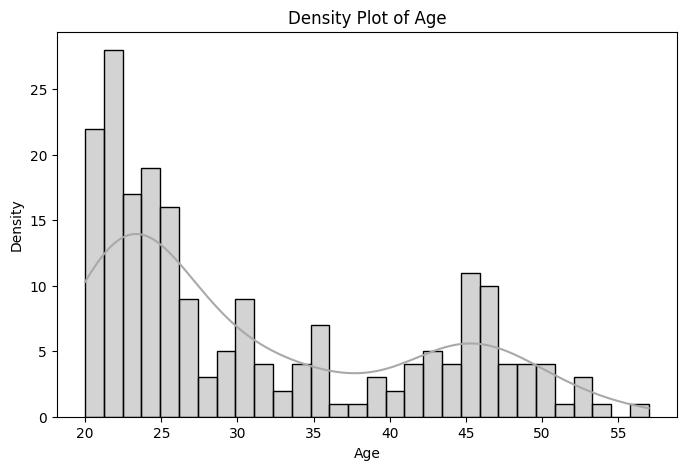

In [ ]:
# Histogram Density Plot: Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(user_group['Age'], kde=True, color='darkgrey', bins=30, edgecolor='black')
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(False)
plt.show()

## **Response Visualization**

In [ ]:
# List of indicators and variables
IBB_items = ['IBB1', 'IBB2', 'IBB3', 'IBB4']
P_items = ['P1', 'P2', 'P3', 'P4']
SI_items = ['SI1', 'SI2', 'SI3', 'SI4', 'SI5', 'SI6']
H_items = ['H1', 'H2', 'H3', 'H4']
SC_items = ['SC1', 'SC2', 'SC3', 'SC4', 'SC5']
NE_items = ['NE1', 'NE2', 'NE3', 'NE4', 'NE5']

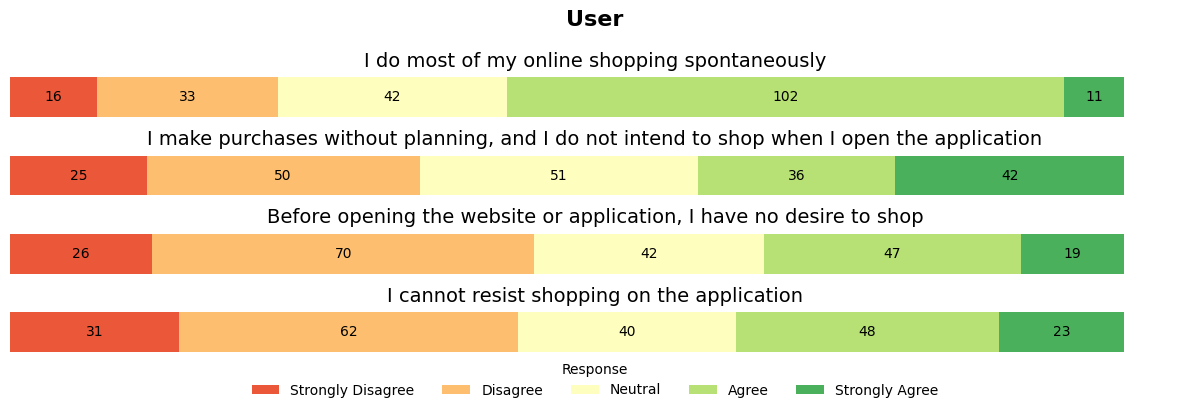

In [ ]:
# Single Stacked Bar Chart: IBB
counts = pd.DataFrame({
    'IBB1': user_group['IBB1'].value_counts().sort_index(),
    'IBB2': user_group['IBB2'].value_counts().sort_index(),
    'IBB3': user_group['IBB3'].value_counts().sort_index(),
    'IBB4': user_group['IBB4'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['IBB1', 'IBB2', 'IBB3', 'IBB4']
titles = ["I do most of my online shopping spontaneously",
          "I make purchases without planning, and I do not intend to shop when I open the application",
          "Before opening the website or application, I have no desire to shop",
          "I cannot resist shopping on the application"]

# Subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 4))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

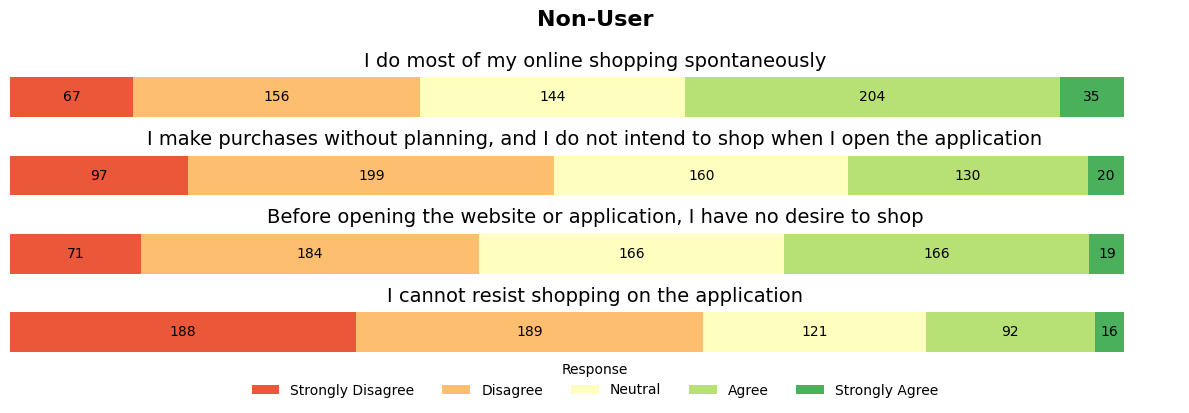

In [ ]:
# Single Stacked Bar Chart: IBB
counts = pd.DataFrame({
    'IBB1': non_user_group['IBB1'].value_counts().sort_index(),
    'IBB2': non_user_group['IBB2'].value_counts().sort_index(),
    'IBB3': non_user_group['IBB3'].value_counts().sort_index(),
    'IBB4': non_user_group['IBB4'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['IBB1', 'IBB2', 'IBB3', 'IBB4']
titles = ["I do most of my online shopping spontaneously",
          "I make purchases without planning, and I do not intend to shop when I open the application",
          "Before opening the website or application, I have no desire to shop",
          "I cannot resist shopping on the application"]

# Subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 4))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("Non-User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

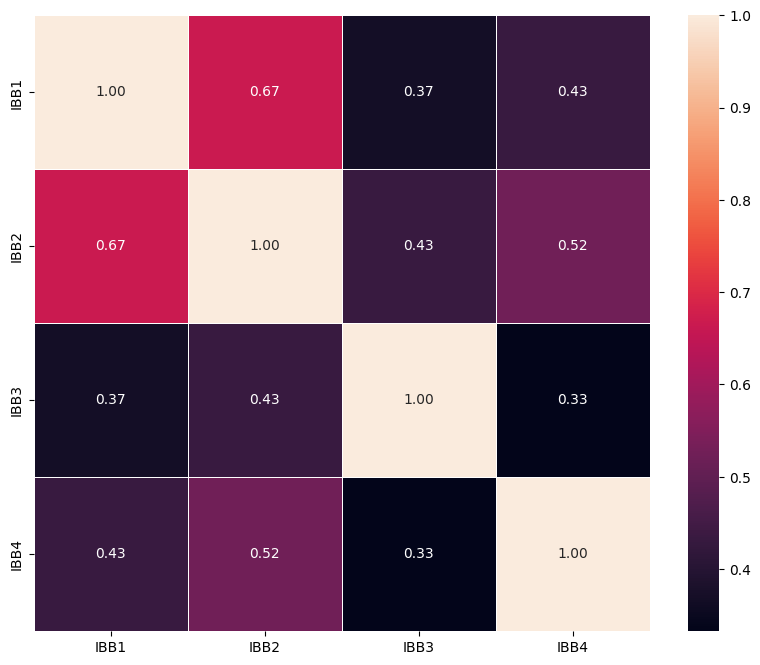

In [ ]:
# IBB
corr_matrix = df[IBB_items].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, linewidths=0.5)

# plt.title('Impulsive Buying Behaviour (IBB)')
plt.show()

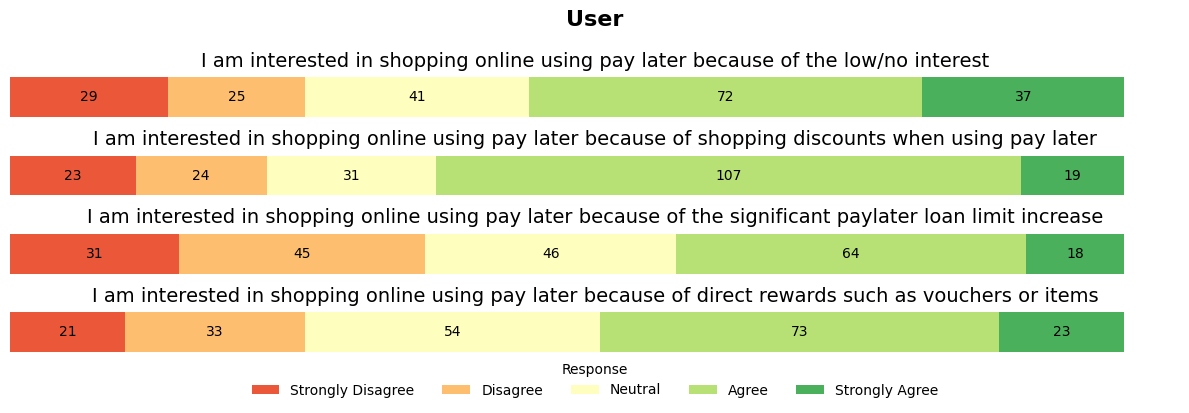

In [ ]:
# Single Stacked Bar Chart: P
counts = pd.DataFrame({
    'P1': user_group['P1'].value_counts().sort_index(),
    'P2': user_group['P2'].value_counts().sort_index(),
    'P3': user_group['P3'].value_counts().sort_index(),
    'P4': user_group['P4'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['P1', 'P2', 'P3', 'P4']
titles = [
  "I am interested in shopping online using pay later because of the low/no interest",
  "I am interested in shopping online using pay later because of shopping discounts when using pay later",
  "I am interested in shopping online using pay later because of the significant paylater loan limit increase",
  "I am interested in shopping online using pay later because of direct rewards such as vouchers or items"
]

# Subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 4))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

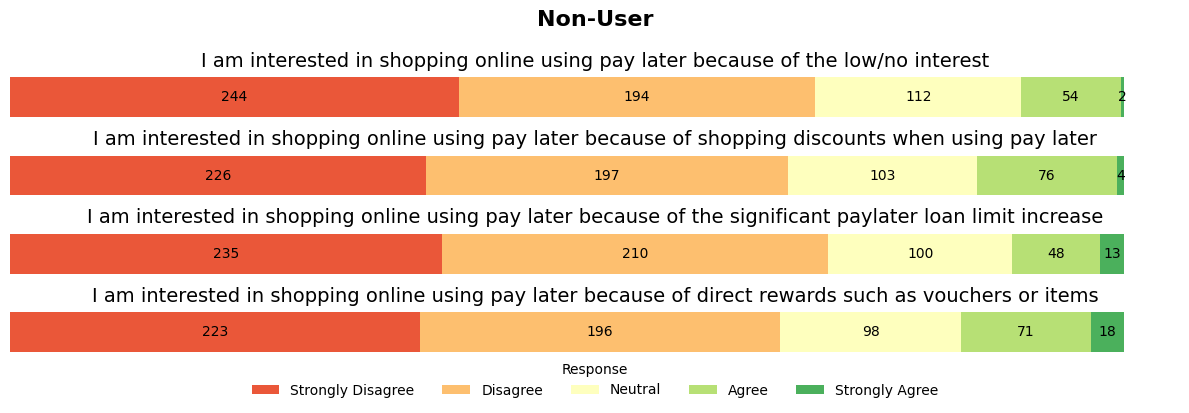

In [ ]:
# Single Stacked Bar Chart: P
counts = pd.DataFrame({
    'P1': non_user_group['P1'].value_counts().sort_index(),
    'P2': non_user_group['P2'].value_counts().sort_index(),
    'P3': non_user_group['P3'].value_counts().sort_index(),
    'P4': non_user_group['P4'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['P1', 'P2', 'P3', 'P4']
titles = [
  "I am interested in shopping online using pay later because of the low/no interest",
  "I am interested in shopping online using pay later because of shopping discounts when using pay later",
  "I am interested in shopping online using pay later because of the significant paylater loan limit increase",
  "I am interested in shopping online using pay later because of direct rewards such as vouchers or items"
]

# Subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 4))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("Non-User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

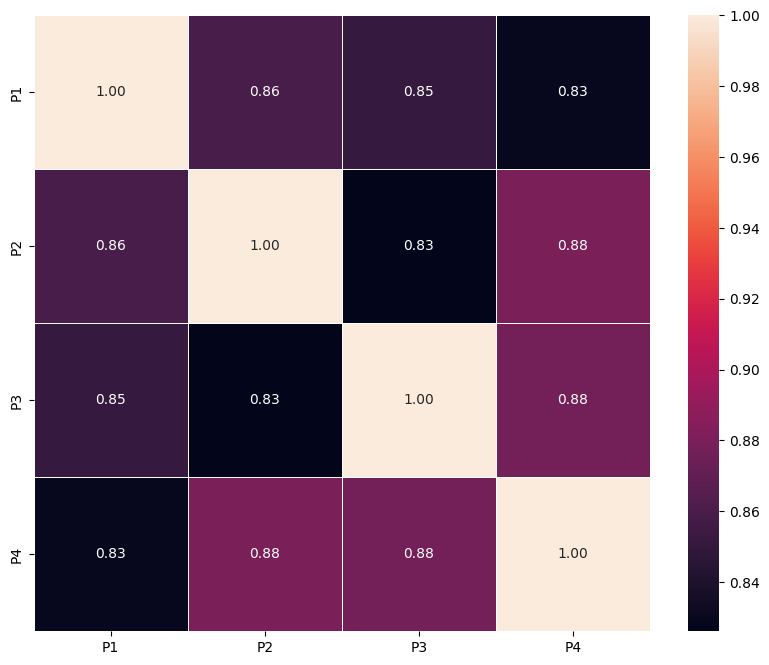

In [ ]:
# P
corr_matrix = df[P_items].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, linewidths=0.5)

# plt.title('e-Paylater Promotion (P)')
plt.show()

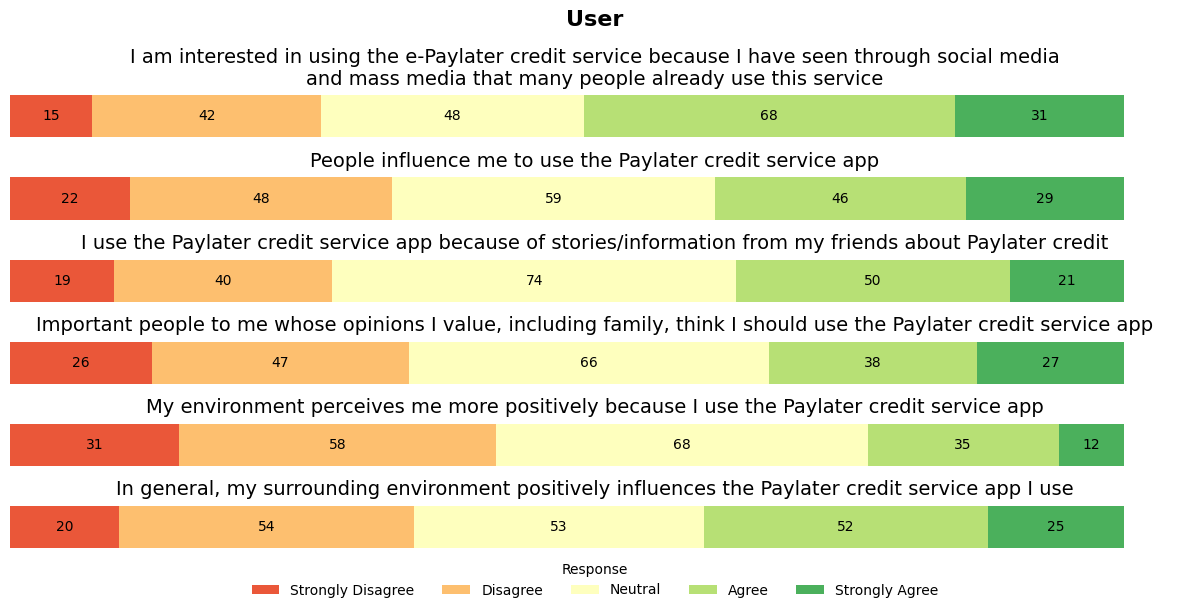

In [ ]:
# Single Stacked Bar Chart: SI
counts = pd.DataFrame({
    'SI1': user_group['SI1'].value_counts().sort_index(),
    'SI2': user_group['SI2'].value_counts().sort_index(),
    'SI3': user_group['SI3'].value_counts().sort_index(),
    'SI4': user_group['SI4'].value_counts().sort_index(),
    'SI5': user_group['SI5'].value_counts().sort_index(),
    'SI6': user_group['SI6'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['SI1', 'SI2', 'SI3', 'SI4', 'SI5', 'SI6']
titles = [
  "I am interested in using the e-Paylater credit service because I have seen through social media\nand mass media that many people already use this service",
  "People influence me to use the Paylater credit service app",
  "I use the Paylater credit service app because of stories/information from my friends about Paylater credit",
  "Important people to me whose opinions I value, including family, think I should use the Paylater credit service app",
  "My environment perceives me more positively because I use the Paylater credit service app",
  "In general, my surrounding environment positively influences the Paylater credit service app I use"
]

# Subplot
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 6))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("User", fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(bottom=0.08)
plt.show()

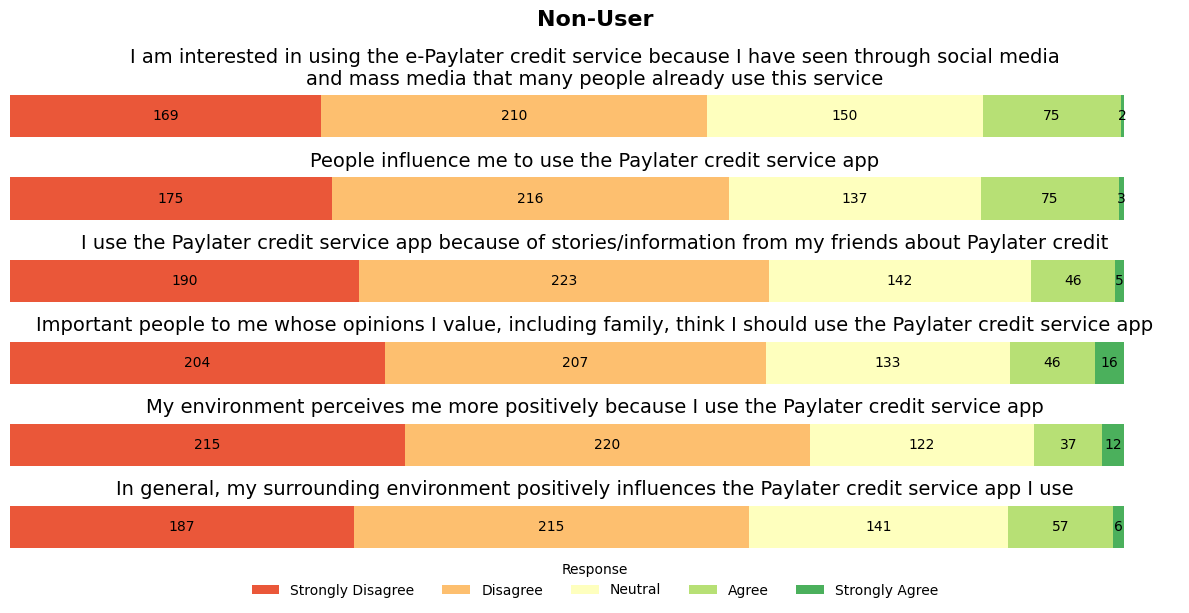

In [ ]:
# Single Stacked Bar Chart: SI
counts = pd.DataFrame({
    'SI1': non_user_group['SI1'].value_counts().sort_index(),
    'SI2': non_user_group['SI2'].value_counts().sort_index(),
    'SI3': non_user_group['SI3'].value_counts().sort_index(),
    'SI4': non_user_group['SI4'].value_counts().sort_index(),
    'SI5': non_user_group['SI5'].value_counts().sort_index(),
    'SI6': non_user_group['SI6'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['SI1', 'SI2', 'SI3', 'SI4', 'SI5', 'SI6']
titles = [
  "I am interested in using the e-Paylater credit service because I have seen through social media\nand mass media that many people already use this service",
  "People influence me to use the Paylater credit service app",
  "I use the Paylater credit service app because of stories/information from my friends about Paylater credit",
  "Important people to me whose opinions I value, including family, think I should use the Paylater credit service app",
  "My environment perceives me more positively because I use the Paylater credit service app",
  "In general, my surrounding environment positively influences the Paylater credit service app I use"
]

# Subplot
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 6))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("Non-User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.08)
plt.show()

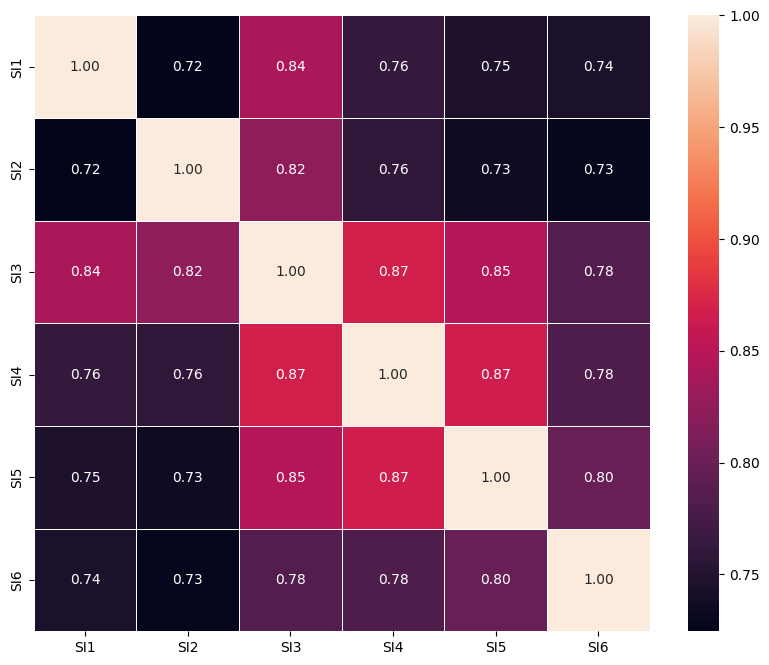

In [ ]:
# SI
corr_matrix = df[SI_items].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, linewidths=0.5)

# plt.title('Social Influence (SI)')
plt.show()

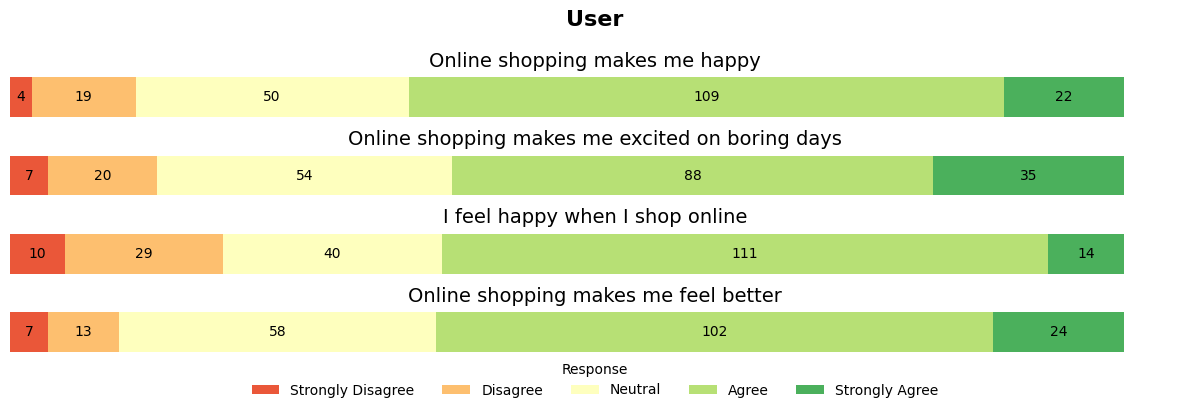

In [ ]:
# Single Stacked Bar Chart: H
counts = pd.DataFrame({
    'H1': user_group['H1'].value_counts().sort_index(),
    'H2': user_group['H2'].value_counts().sort_index(),
    'H3': user_group['H3'].value_counts().sort_index(),
    'H4': user_group['H4'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['H1', 'H2', 'H3', 'H4']
titles = [
  "Online shopping makes me happy",
  "Online shopping makes me excited on boring days",
  "I feel happy when I shop online",
  "Online shopping makes me feel better"
]

# Subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 4))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

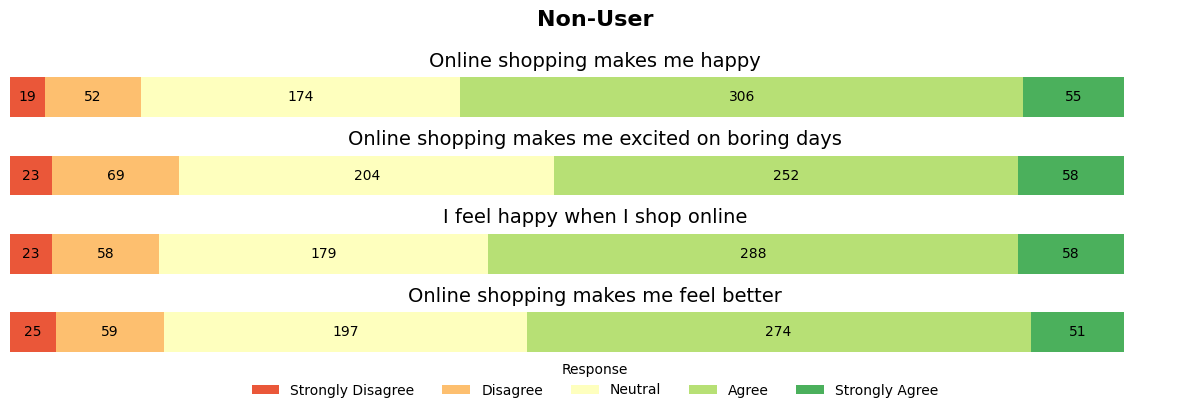

In [ ]:
# Single Stacked Bar Chart: H
counts = pd.DataFrame({
    'H1': non_user_group['H1'].value_counts().sort_index(),
    'H2': non_user_group['H2'].value_counts().sort_index(),
    'H3': non_user_group['H3'].value_counts().sort_index(),
    'H4': non_user_group['H4'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['H1', 'H2', 'H3', 'H4']
titles = [
  "Online shopping makes me happy",
  "Online shopping makes me excited on boring days",
  "I feel happy when I shop online",
  "Online shopping makes me feel better"
]

# Subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 4))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("Non-User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

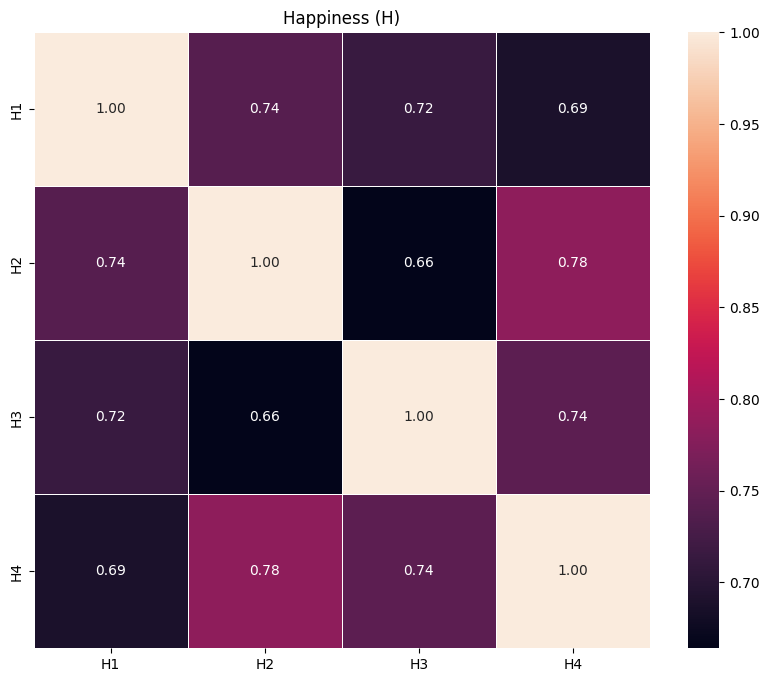

In [ ]:
# H
corr_matrix = df[H_items].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, linewidths=0.5)

plt.title('Happiness (H)')
plt.show()

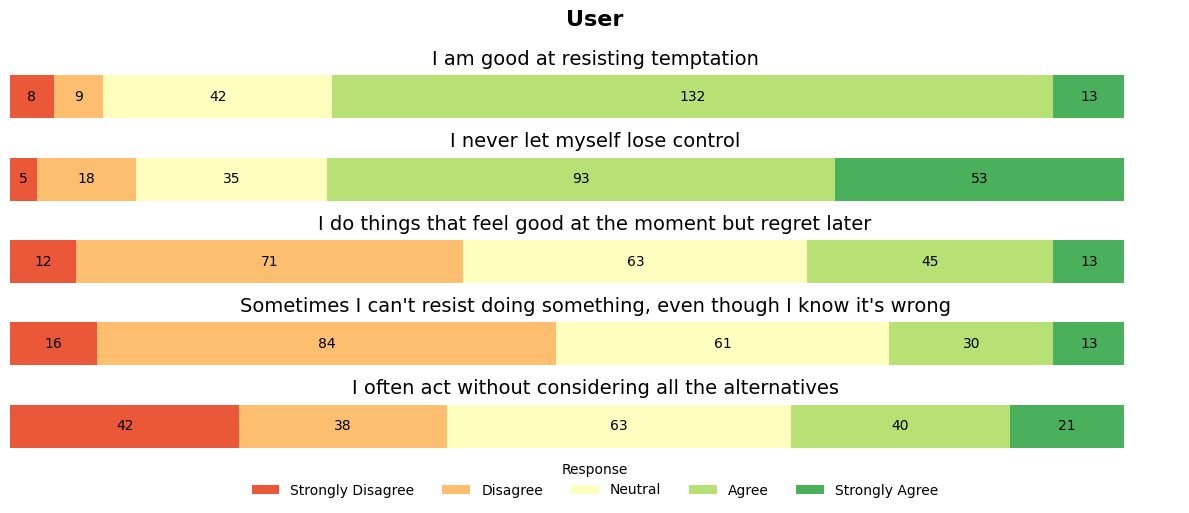

In [ ]:
# Single Stacked Bar Chart: SC
counts = pd.DataFrame({
    'SC1': user_group['SC1'].value_counts().sort_index(),
    'SC2': user_group['SC2'].value_counts().sort_index(),
    'SC3': user_group['SC3'].value_counts().sort_index(),
    'SC4': user_group['SC4'].value_counts().sort_index(),
    'SC5': user_group['SC5'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['SC1', 'SC2', 'SC3', 'SC4', 'SC5']
titles = ["I am good at resisting temptation",
          "I never let myself lose control",
          "I do things that feel good at the moment but regret later",
          "Sometimes I can't resist doing something, even though I know it's wrong",
          "I often act without considering all the alternatives"]

# Subplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 5))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

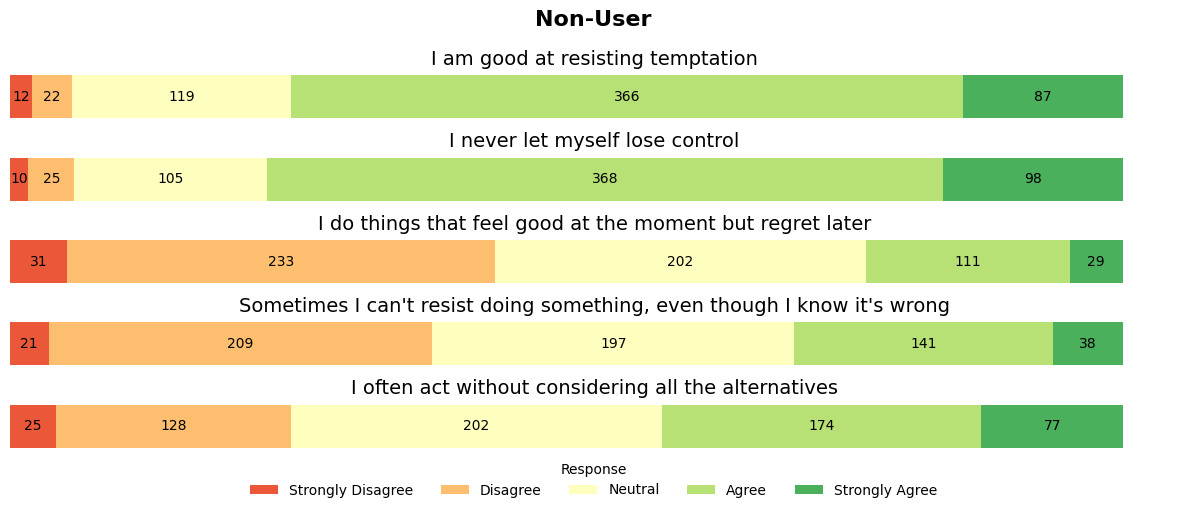

In [ ]:
# Single Stacked Bar Chart: SC
counts = pd.DataFrame({
    'SC1': non_user_group['SC1'].value_counts().sort_index(),
    'SC2': non_user_group['SC2'].value_counts().sort_index(),
    'SC3': non_user_group['SC3'].value_counts().sort_index(),
    'SC4': non_user_group['SC4'].value_counts().sort_index(),
    'SC5': non_user_group['SC5'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['SC1', 'SC2', 'SC3', 'SC4', 'SC5']
titles = ["I am good at resisting temptation",
          "I never let myself lose control",
          "I do things that feel good at the moment but regret later",
          "Sometimes I can't resist doing something, even though I know it's wrong",
          "I often act without considering all the alternatives"]

# Subplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 5))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("Non-User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

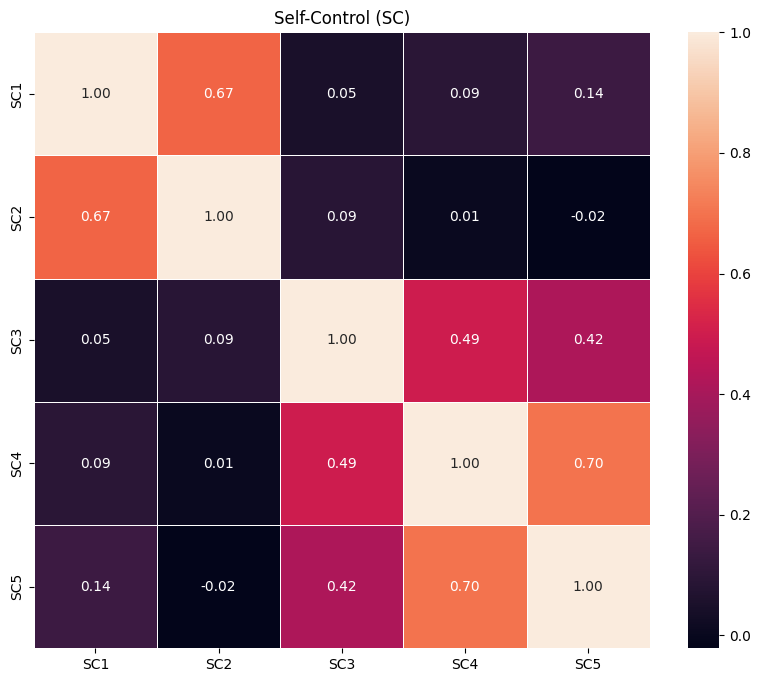

In [ ]:
# SC
corr_matrix = df[SC_items].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, linewidths=0.5)

plt.title('Self-Control (SC)')
plt.show()

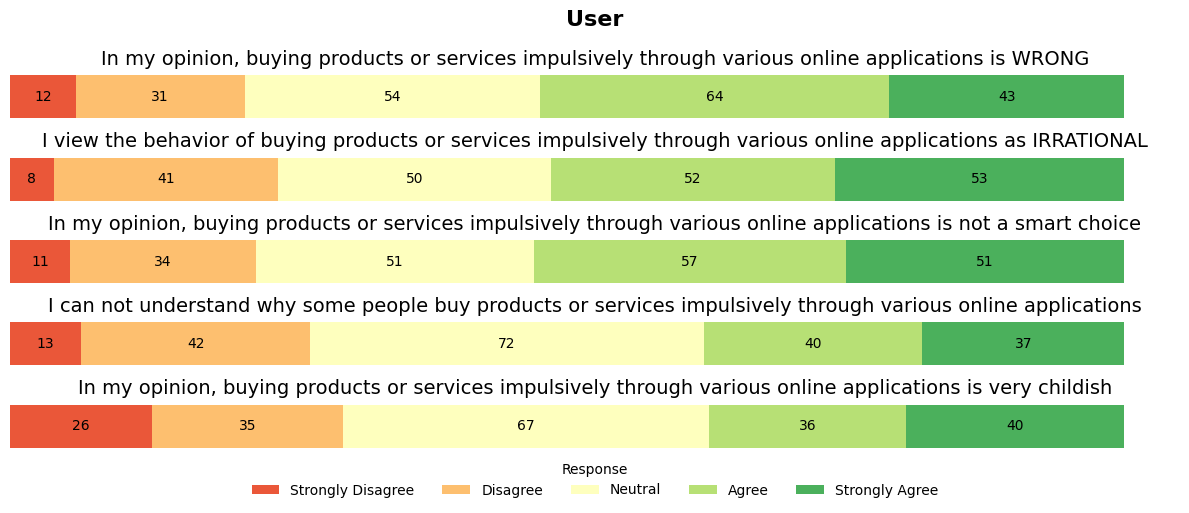

In [ ]:
# Single Stacked Bar Chart: NE
counts = pd.DataFrame({
    'NE1': user_group['NE1'].value_counts().sort_index(),
    'NE2': user_group['NE2'].value_counts().sort_index(),
    'NE3': user_group['NE3'].value_counts().sort_index(),
    'NE4': user_group['NE4'].value_counts().sort_index(),
    'NE5': user_group['NE5'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['NE1', 'NE2', 'NE3', 'NE4', 'NE5']
titles = ["In my opinion, buying products or services impulsively through various online applications is WRONG",
          "I view the behavior of buying products or services impulsively through various online applications as IRRATIONAL",
          "In my opinion, buying products or services impulsively through various online applications is not a smart choice",
          "I can not understand why some people buy products or services impulsively through various online applications",
          "In my opinion, buying products or services impulsively through various online applications is very childish"]

# Subplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 5))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

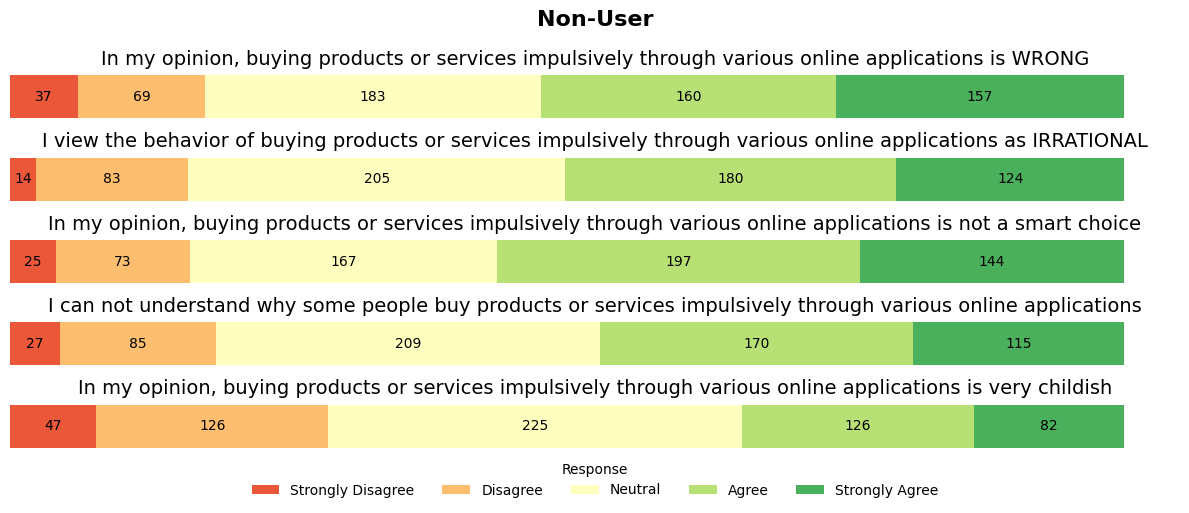

In [ ]:
# Single Stacked Bar Chart: NE
counts = pd.DataFrame({
    'NE1': non_user_group['NE1'].value_counts().sort_index(),
    'NE2': non_user_group['NE2'].value_counts().sort_index(),
    'NE3': non_user_group['NE3'].value_counts().sort_index(),
    'NE4': non_user_group['NE4'].value_counts().sort_index(),
    'NE5': non_user_group['NE5'].value_counts().sort_index()
}).T.fillna(0).astype(int)

# Set colors
colors = sns.color_palette("RdYlGn", 5)
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# List of columns and title
columns = ['NE1', 'NE2', 'NE3', 'NE4', 'NE5']
titles = ["In my opinion, buying products or services impulsively through various online applications is WRONG",
          "I view the behavior of buying products or services impulsively through various online applications as IRRATIONAL",
          "In my opinion, buying products or services impulsively through various online applications is not a smart choice",
          "I can not understand why some people buy products or services impulsively through various online applications",
          "In my opinion, buying products or services impulsively through various online applications is very childish"]

# Subplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 5))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    values = counts.loc[col]
    left = 0

    for j, score in enumerate(range(1, 6)):
        val = values[score]
        bar = ax.barh(col, val, left=left, color=colors[j], label=legend_labels[j] if i == 0 else "")

        if val > 0:
            ax.text(left + val / 2, 0, str(val), ha='center', va='center', color='black', fontsize=10)
        left += val

    ax.set_title(title, fontsize=14)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Response", loc='lower center',
           bbox_to_anchor=(0.5, -0.02), ncol=5, frameon=False)

# Add main title
plt.suptitle("Non-User", fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

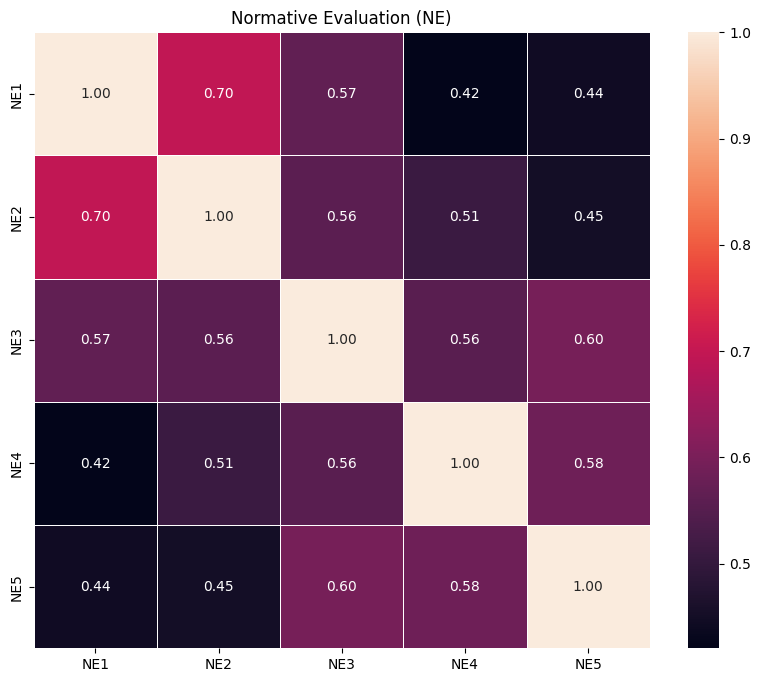

In [ ]:
# NE
corr_matrix = df[NE_items].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, linewidths=0.5)

plt.title('Normative Evaluation (NE)')
plt.show()

## **Mann-Whitney Test**

An independent samples t-test, or independent t-test, is a statistical test used to compare the means of two independent groups to determine if there's a significant difference between them.

In this context, t-test will perform under these hypotheses:
*   H0: μ (User) = μ(Non-User)
*   H1: μ (User) =! μ(Non-User)

If p-value < 0.05, reject null hypotheses, thus, there is difference between user group and non-user group.



In [ ]:
# Calculate sum of score by indicator
df['IBB_score'] = df[IBB_items].sum(axis=1)
df['P_score'] = df[P_items].sum(axis=1)
df['SI_score'] = df[SI_items].sum(axis=1)
df['H_score'] = df[H_items].sum(axis=1)
df['SC_score'] = df[SC_items].sum(axis=1)
df['NE_score'] = df[NE_items].sum(axis=1)

# Calculate overall score
df['Total_score'] = df[['IBB_score', 'P_score', 'H_score', 'NE_score', 'SC_score']].sum(axis=1)

In [ ]:
# Filter 2 groups by status
user_group = df[df['E-Paylater User Status'] == 'User']
non_user_group = df[df['E-Paylater User Status'] == 'Non-User']

### **IBB**

In [ ]:
# Calculate score by group
user_scores_ibb = user_group[IBB_items].sum(axis=1)
non_user_scores_ibb = non_user_group[IBB_items].sum(axis=1)

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ibb, non_user_scores_ibb, alternative='two-sided')

# Show statistics summary
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb.mean(),
        user_scores_ibb.std(),
        user_scores_ibb.var()
    ],
    'Non-User': [
        non_user_scores_ibb.mean(),
        non_user_scores_ibb.std(),
        non_user_scores_ibb.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# Show result
print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

               User   Non-User
mean      12.058824  10.676568
std        3.561766   3.438385
variance  12.686178  11.822491
U-statistic: 76317.0000
p-value: 0.0000


In [ ]:
# Calculate score by group
user_scores_ibb = user_group['IBB1']
non_user_scores_ibb = non_user_group['IBB1']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ibb, non_user_scores_ibb, alternative='two-sided')

# Show statistics summary
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb.mean(),
        user_scores_ibb.std(),
        user_scores_ibb.var()
    ],
    'Non-User': [
        non_user_scores_ibb.mean(),
        non_user_scores_ibb.std(),
        non_user_scores_ibb.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# Show result
print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.289216  2.973597
std       1.054982  1.126376
variance  1.112987  1.268723
U-statistic: 72022.5000
p-value: 0.0002


In [ ]:
# Calculate IBB score by group
user_scores_ibb2 = user_group['IBB2']
non_user_scores_ibb2 = non_user_group['IBB2']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ibb2, non_user_scores_ibb2, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb2.mean(),
        user_scores_ibb2.std(),
        user_scores_ibb2.var()
    ],
    'Non-User': [
        non_user_scores_ibb2.mean(),
        non_user_scores_ibb2.std(),
        non_user_scores_ibb2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.098039  2.632013
std       1.316884  1.087068
variance  1.734183  1.181717
t-statistic: 74001.5000
p-value: 0.0000


In [ ]:
# Calculate IBB score by group
user_scores_ibb3 = user_group['IBB3']
non_user_scores_ibb3 = non_user_group['IBB3']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ibb3, non_user_scores_ibb3, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb3.mean(),
        user_scores_ibb3.std(),
        user_scores_ibb3.var()
    ],
    'Non-User': [
        non_user_scores_ibb3.mean(),
        non_user_scores_ibb3.std(),
        non_user_scores_ibb3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.818627  2.798680
std       1.195824  1.064404
variance  1.429996  1.132957
t-statistic: 61550.5000
p-value: 0.9255


In [ ]:
# Calculate IBB score by group
user_scores_ibb4 = user_group['IBB4']
non_user_scores_ibb4 = non_user_group['IBB4']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ibb4, non_user_scores_ibb4, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb4.mean(),
        user_scores_ibb4.std(),
        user_scores_ibb4.var()
    ],
    'Non-User': [
        non_user_scores_ibb4.mean(),
        non_user_scores_ibb4.std(),
        non_user_scores_ibb4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.852941  2.272277
std       1.258642  1.132593
variance  1.584178  1.282767
t-statistic: 77795.0000
p-value: 0.0000


### **P**

In [ ]:
# Calculate P score by group
user_scores_p1 = user_group['P1']
non_user_scores_p1 = non_user_group['P1']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_p1, non_user_scores_p1, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p1.mean(),
        user_scores_p1.std(),
        user_scores_p1.var()
    ],
    'Non-User': [
        non_user_scores_p1.mean(),
        non_user_scores_p1.std(),
        non_user_scores_p1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.308824  1.970297
std       1.297106  0.987078
variance  1.682483  0.974323
u-statistic: 96246.0000
p-value: 0.0000


In [ ]:
# Calculate P score by group
user_scores_p2 = user_group['P2']
non_user_scores_p2 = non_user_group['P2']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_p2, non_user_scores_p2, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p2.mean(),
        user_scores_p2.std(),
        user_scores_p2.var()
    ],
    'Non-User': [
        non_user_scores_p2.mean(),
        non_user_scores_p2.std(),
        non_user_scores_p2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.367647  2.067657
std       1.156320  1.049381
variance  1.337076  1.101200
u-statistic: 96920.5000
p-value: 0.0000


In [ ]:
# Calculate P score by group
user_scores_p3 = user_group['P3']
non_user_scores_p3 = non_user_group['P3']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_p3, non_user_scores_p3, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p3.mean(),
        user_scores_p3.std(),
        user_scores_p3.var()
    ],
    'Non-User': [
        non_user_scores_p3.mean(),
        non_user_scores_p3.std(),
        non_user_scores_p3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.965686  2.000000
std       1.225267  1.031728
variance  1.501280  1.064463
u-statistic: 88919.5000
p-value: 0.0000


In [ ]:
# Calculate P score by group
user_scores_p4 = user_group['P4']
non_user_scores_p4 = non_user_group['P4']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_p4, non_user_scores_p4, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p4.mean(),
        user_scores_p4.std(),
        user_scores_p4.var()
    ],
    'Non-User': [
        non_user_scores_p4.mean(),
        non_user_scores_p4.std(),
        non_user_scores_p4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.215686  2.117162
std       1.158625  1.119830
variance  1.342413  1.254019
u-statistic: 92270.0000
p-value: 0.0000


### **SI**

In [ ]:
# Calculate SI score by group
user_scores_si1 = user_group['SI1']
non_user_scores_si1 = non_user_group['SI1']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_si1, non_user_scores_si1, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si1.mean(),
        user_scores_si1.std(),
        user_scores_si1.var()
    ],
    'Non-User': [
        non_user_scores_si1.mean(),
        non_user_scores_si1.std(),
        non_user_scores_si1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.284314  2.226073
std       1.169206  1.000849
variance  1.367043  1.001699
u-statistic: 91844.5000
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si2 = user_group['SI2']
non_user_scores_si2 = non_user_group['SI2']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_si2, non_user_scores_si2, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si2.mean(),
        user_scores_si2.std(),
        user_scores_si2.var()
    ],
    'Non-User': [
        non_user_scores_si2.mean(),
        non_user_scores_si2.std(),
        non_user_scores_si2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.058824  2.199670
std       1.210167  1.008099
variance  1.464503  1.016264
u-statistic: 86163.0000
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si3 = user_group['SI3']
non_user_scores_si3 = non_user_group['SI3']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_si3, non_user_scores_si3, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si3.mean(),
        user_scores_si3.std(),
        user_scores_si3.var()
    ],
    'Non-User': [
        non_user_scores_si3.mean(),
        non_user_scores_si3.std(),
        non_user_scores_si3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.068627  2.097360
std       1.107607  0.958007
variance  1.226794  0.917778
u-statistic: 91254.5000
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si4 = user_group['SI4']
non_user_scores_si4 = non_user_group['SI4']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_si4, non_user_scores_si4, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si4.mean(),
        user_scores_si4.std(),
        user_scores_si4.var()
    ],
    'Non-User': [
        non_user_scores_si4.mean(),
        non_user_scores_si4.std(),
        non_user_scores_si4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.965686  2.113861
std       1.209079  1.042203
variance  1.461871  1.086188
u-statistic: 86311.5000
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si5 = user_group['SI5']
non_user_scores_si5 = non_user_group['SI5']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_si5, non_user_scores_si5, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si5.mean(),
        user_scores_si5.std(),
        user_scores_si5.var()
    ],
    'Non-User': [
        non_user_scores_si5.mean(),
        non_user_scores_si5.std(),
        non_user_scores_si5.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.700980  2.028053
std       1.102527  0.989635
variance  1.215566  0.979377
u-statistic: 83253.0000
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si6 = user_group['SI6']
non_user_scores_si6 = non_user_group['SI6']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_si6, non_user_scores_si6, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si6.mean(),
        user_scores_si6.std(),
        user_scores_si6.var()
    ],
    'Non-User': [
        non_user_scores_si6.mean(),
        non_user_scores_si6.std(),
        non_user_scores_si6.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.039216  2.141914
std       1.186306  0.994028
variance  1.407322  0.988092
u-statistic: 87608.5000
p-value: 0.0000


### **H**

In [ ]:
# Calculate H score by group
user_scores_h1 = user_group['H1']
non_user_scores_h1 = non_user_group['H1']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_h1, non_user_scores_h1, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h1.mean(),
        user_scores_h1.std(),
        user_scores_h1.var()
    ],
    'Non-User': [
        non_user_scores_h1.mean(),
        non_user_scores_h1.std(),
        non_user_scores_h1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.617647  3.537954
std       0.871487  0.889449
variance  0.759490  0.791119
u-statistic: 64902.0000
p-value: 0.2443


In [ ]:
# Calculate H score by group
user_scores_h2 = user_group['H2']
non_user_scores_h2 = non_user_group['H2']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_h2, non_user_scores_h2, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h2.mean(),
        user_scores_h2.std(),
        user_scores_h2.var()
    ],
    'Non-User': [
        non_user_scores_h2.mean(),
        non_user_scores_h2.std(),
        non_user_scores_h2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.607843  3.417492
std       0.994139  0.944208
variance  0.988313  0.891528
u-statistic: 69037.5000
p-value: 0.0081


In [ ]:
# Calculate H score by group
user_scores_h3 = user_group['H3']
non_user_scores_h3 = non_user_group['H3']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_h3, non_user_scores_h3, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h3.mean(),
        user_scores_h3.std(),
        user_scores_h3.var()
    ],
    'Non-User': [
        non_user_scores_h3.mean(),
        non_user_scores_h3.std(),
        non_user_scores_h3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.441176  3.495050
std       0.983344  0.928417
variance  0.966966  0.861959
u-statistic: 61365.0000
p-value: 0.8676


In [ ]:
# Calculate H score by group
user_scores_h4 = user_group['H4']
non_user_scores_h4 = non_user_group['H4']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_h4, non_user_scores_h4, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h4.mean(),
        user_scores_h4.std(),
        user_scores_h4.var()
    ],
    'Non-User': [
        non_user_scores_h4.mean(),
        non_user_scores_h4.std(),
        non_user_scores_h4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.602941  3.440594
std       0.901117  0.926525
variance  0.812011  0.858449
u-statistic: 67949.0000
p-value: 0.0226


### **SC**

In [ ]:
# Calculate SC score by group
user_scores_sc1 = user_group['SC1']
non_user_scores_sc1 = non_user_group['SC1']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_sc1, non_user_scores_sc1, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc1.mean(),
        user_scores_sc1.std(),
        user_scores_sc1.var()
    ],
    'Non-User': [
        non_user_scores_sc1.mean(),
        non_user_scores_sc1.std(),
        non_user_scores_sc1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.651961  3.815182
std       0.825365  0.793882
variance  0.681228  0.630248
u-statistic: 55846.5000
p-value: 0.0178


In [ ]:
# Calculate SC score by group
user_scores_sc2 = user_group['SC2']
non_user_scores_sc2 = non_user_group['SC2']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_sc2, non_user_scores_sc2, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc2.mean(),
        user_scores_sc2.std(),
        user_scores_sc2.var()
    ],
    'Non-User': [
        non_user_scores_sc2.mean(),
        non_user_scores_sc2.std(),
        non_user_scores_sc2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.838235  3.856436
std       0.991744  0.793059
variance  0.983555  0.628942
u-statistic: 63145.5000
p-value: 0.6070


In [ ]:
# Calculate SC score by group
user_scores_sc3 = user_group['SC3']
non_user_scores_sc3 = non_user_group['SC3']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_sc3, non_user_scores_sc3, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc3.mean(),
        user_scores_sc3.std(),
        user_scores_sc3.var()
    ],
    'Non-User': [
        non_user_scores_sc3.mean(),
        non_user_scores_sc3.std(),
        non_user_scores_sc3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.882353  2.792079
std       1.024759  0.960201
variance  1.050130  0.921987
u-statistic: 64810.5000
p-value: 0.2755


In [ ]:
# Calculate SC score by group
user_scores_sc4 = user_group['SC4']
non_user_scores_sc4 = non_user_group['SC4']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_sc4, non_user_scores_sc4, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc4.mean(),
        user_scores_sc4.std(),
        user_scores_sc4.var()
    ],
    'Non-User': [
        non_user_scores_sc4.mean(),
        non_user_scores_sc4.std(),
        non_user_scores_sc4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.705882  2.943894
std       1.022777  0.982569
variance  1.046074  0.965442
u-statistic: 53304.5000
p-value: 0.0020


In [ ]:
# Calculate SC score by group
user_scores_sc5 = user_group['SC5']
non_user_scores_sc5 = non_user_group['SC5']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_sc5, non_user_scores_sc5, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc5.mean(),
        user_scores_sc5.std(),
        user_scores_sc5.var()
    ],
    'Non-User': [
        non_user_scores_sc5.mean(),
        non_user_scores_sc5.std(),
        non_user_scores_sc5.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.803922  3.247525
std       1.259754  1.054601
variance  1.586980  1.112184
u-statistic: 49506.5000
p-value: 0.0000


### **NE**

In [ ]:
# Calculate NE score by group
user_scores_ne1 = user_group['NE1']
non_user_scores_ne1 = non_user_group['NE1']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ne1, non_user_scores_ne1, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne1.mean(),
        user_scores_ne1.std(),
        user_scores_ne1.var()
    ],
    'Non-User': [
        non_user_scores_ne1.mean(),
        non_user_scores_ne1.std(),
        non_user_scores_ne1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.465686  3.546205
std       1.154899  1.167187
variance  1.333792  1.362324
u-statistic: 59402.0000
p-value: 0.3891


In [ ]:
# Calculate NE score by group
user_scores_ne2 = user_group['NE2']
non_user_scores_ne2 = non_user_group['NE2']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ne2, non_user_scores_ne2, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne2.mean(),
        user_scores_ne2.std(),
        user_scores_ne2.var()
    ],
    'Non-User': [
        non_user_scores_ne2.mean(),
        non_user_scores_ne2.std(),
        non_user_scores_ne2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.495098  3.523102
std       1.189020  1.035866
variance  1.413769  1.073019
u-statistic: 61522.5000
p-value: 0.9175


In [ ]:
# Calculate NE score by group
user_scores_ne3 = user_group['NE3']
non_user_scores_ne3 = non_user_group['NE3']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ne3, non_user_scores_ne3, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne3.mean(),
        user_scores_ne3.std(),
        user_scores_ne3.var()
    ],
    'Non-User': [
        non_user_scores_ne3.mean(),
        non_user_scores_ne3.std(),
        non_user_scores_ne3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.504902  3.597360
std       1.189020  1.098275
variance  1.413769  1.206208
u-statistic: 59438.5000
p-value: 0.3954


In [ ]:
# Calculate NE score by group
user_scores_ne4 = user_group['NE4']
non_user_scores_ne4 = non_user_group['NE4']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ne4, non_user_scores_ne4, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne4.mean(),
        user_scores_ne4.std(),
        user_scores_ne4.var()
    ],
    'Non-User': [
        non_user_scores_ne4.mean(),
        non_user_scores_ne4.std(),
        non_user_scores_ne4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.225490  3.430693
std       1.156748  1.083756
variance  1.338066  1.174527
u-statistic: 55217.0000
p-value: 0.0180


In [ ]:
# Calculate NE score by group
user_scores_ne5 = user_group['NE5']
non_user_scores_ne5 = non_user_group['NE5']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(user_scores_ne5, non_user_scores_ne5, alternative='two-sided')

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne5.mean(),
        user_scores_ne5.std(),
        user_scores_ne5.var()
    ],
    'Non-User': [
        non_user_scores_ne5.mean(),
        non_user_scores_ne5.std(),
        non_user_scores_ne5.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"u-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.142157  3.115512
std       1.276690  1.120739
variance  1.629938  1.256057
u-statistic: 62785.5000
p-value: 0.7275


## **T-test**

An independent samples t-test, or independent t-test, is a statistical test used to compare the means of two independent groups to determine if there's a significant difference between them.

In this context, t-test will perform under these hypotheses:
*   H0: μ (User) = μ(Non-User)
*   H1: μ (User) =! μ(Non-User)

If p-value < 0.05, reject null hypotheses, thus, there is difference between user group and non-user group.



In [ ]:
# Calculate sum of score by indicator
df['IBB_score'] = df[IBB_items].sum(axis=1)
df['P_score'] = df[P_items].sum(axis=1)
df['SI_score'] = df[SI_items].sum(axis=1)
df['H_score'] = df[H_items].sum(axis=1)
df['SC_score'] = df[SC_items].sum(axis=1)
df['NE_score'] = df[NE_items].sum(axis=1)

# Calculate overall score
df['Total_score'] = df[['IBB_score', 'P_score', 'H_score', 'NE_score', 'SC_score']].sum(axis=1)

In [ ]:
# Filter 2 groups by status
user_group = df[df['E-Paylater User Status'] == 'User']
non_user_group = df[df['E-Paylater User Status'] == 'Non-User']

### **IBB**

In [ ]:
# Calculate IBB score by group
user_scores_ibb = user_group[IBB_items].sum(axis=1)
non_user_scores_ibb = non_user_group[IBB_items].sum(axis=1)

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ibb, non_user_scores_ibb, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb.mean(),
        user_scores_ibb.std(),
        user_scores_ibb.var()
    ],
    'Non-User': [
        non_user_scores_ibb.mean(),
        non_user_scores_ibb.std(),
        non_user_scores_ibb.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

               User   Non-User
mean      12.058824  10.676568
std        3.561766   3.438385
variance  12.686178  11.822491
t-statistic: 4.9215
p-value: 0.0000


In [ ]:
# Calculate IBB1 score by group
user_scores_ibb1 = user_group['IBB1']
non_user_scores_ibb1 = non_user_group['IBB1']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ibb1, non_user_scores_ibb1, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb1.mean(),
        user_scores_ibb1.std(),
        user_scores_ibb1.var()
    ],
    'Non-User': [
        non_user_scores_ibb1.mean(),
        non_user_scores_ibb1.std(),
        non_user_scores_ibb1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.289216  2.973597
std       1.054982  1.126376
variance  1.112987  1.268723
t-statistic: 3.5163
p-value: 0.0005


In [ ]:
# Calculate IBB score by group
user_scores_ibb2 = user_group['IBB2']
non_user_scores_ibb2 = non_user_group['IBB2']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ibb2, non_user_scores_ibb2, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb2.mean(),
        user_scores_ibb2.std(),
        user_scores_ibb2.var()
    ],
    'Non-User': [
        non_user_scores_ibb2.mean(),
        non_user_scores_ibb2.std(),
        non_user_scores_ibb2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.098039  2.632013
std       1.316884  1.087068
variance  1.734183  1.181717
t-statistic: 5.0101
p-value: 0.0000


In [ ]:
# Calculate IBB score by group
user_scores_ibb3 = user_group['IBB3']
non_user_scores_ibb3 = non_user_group['IBB3']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ibb3, non_user_scores_ibb3, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb3.mean(),
        user_scores_ibb3.std(),
        user_scores_ibb3.var()
    ],
    'Non-User': [
        non_user_scores_ibb3.mean(),
        non_user_scores_ibb3.std(),
        non_user_scores_ibb3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.818627  2.798680
std       1.195824  1.064404
variance  1.429996  1.132957
t-statistic: 0.2243
p-value: 0.8226


In [ ]:
# Calculate IBB score by group
user_scores_ibb4 = user_group['IBB4']
non_user_scores_ibb4 = non_user_group['IBB4']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ibb4, non_user_scores_ibb4, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ibb4.mean(),
        user_scores_ibb4.std(),
        user_scores_ibb4.var()
    ],
    'Non-User': [
        non_user_scores_ibb4.mean(),
        non_user_scores_ibb4.std(),
        non_user_scores_ibb4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.852941  2.272277
std       1.258642  1.132593
variance  1.584178  1.282767
t-statistic: 6.1547
p-value: 0.0000


### **P**

In [ ]:
# Calculate P score by group
user_scores_p = user_group[P_items].sum(axis=1)
non_user_scores_p = non_user_group[P_items].sum(axis=1)

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_p, non_user_scores_p, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p.mean(),
        user_scores_p.std(),
        user_scores_p.var()
    ],
    'Non-User': [
        non_user_scores_p.mean(),
        non_user_scores_p.std(),
        non_user_scores_p.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

               User   Non-User
mean      12.857843   8.155116
std        4.039752   3.962514
variance  16.319593  15.701519
t-statistic: 14.5899
p-value: 0.0000


In [ ]:
# Calculate P score by group
user_scores_p1 = user_group['P1']
non_user_scores_p1 = non_user_group['P1']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_p, non_user_scores_p, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p1.mean(),
        user_scores_p1.std(),
        user_scores_p1.var()
    ],
    'Non-User': [
        non_user_scores_p1.mean(),
        non_user_scores_p1.std(),
        non_user_scores_p1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.308824  1.970297
std       1.297106  0.987078
variance  1.682483  0.974323
t-statistic: 14.5899
p-value: 0.0000


In [ ]:
# Calculate P score by group
user_scores_p2 = user_group['P2']
non_user_scores_p2 = non_user_group['P2']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_p2, non_user_scores_p2, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p2.mean(),
        user_scores_p2.std(),
        user_scores_p2.var()
    ],
    'Non-User': [
        non_user_scores_p2.mean(),
        non_user_scores_p2.std(),
        non_user_scores_p2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.367647  2.067657
std       1.156320  1.049381
variance  1.337076  1.101200
t-statistic: 14.9085
p-value: 0.0000


In [ ]:
# Calculate P score by group
user_scores_p3 = user_group['P3']
non_user_scores_p3 = non_user_group['P3']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_p3, non_user_scores_p3, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p3.mean(),
        user_scores_p3.std(),
        user_scores_p3.var()
    ],
    'Non-User': [
        non_user_scores_p3.mean(),
        non_user_scores_p3.std(),
        non_user_scores_p3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.965686  2.000000
std       1.225267  1.031728
variance  1.501280  1.064463
t-statistic: 11.0096
p-value: 0.0000


In [ ]:
# Calculate P score by group
user_scores_p4 = user_group['P4']
non_user_scores_p4 = non_user_group['P4']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_p4, non_user_scores_p4, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_p4.mean(),
        user_scores_p4.std(),
        user_scores_p4.var()
    ],
    'Non-User': [
        non_user_scores_p4.mean(),
        non_user_scores_p4.std(),
        non_user_scores_p4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.215686  2.117162
std       1.158625  1.119830
variance  1.342413  1.254019
t-statistic: 12.0131
p-value: 0.0000


### **SI**

In [ ]:
# Calculate SI score by group
user_scores_si = user_group[SI_items].sum(axis=1)
non_user_scores_si = non_user_group[SI_items].sum(axis=1)

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_si, non_user_scores_si, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si.mean(),
        user_scores_si.std(),
        user_scores_si.var()
    ],
    'Non-User': [
        non_user_scores_si.mean(),
        non_user_scores_si.std(),
        non_user_scores_si.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

               User   Non-User
mean      18.117647  12.806931
std        5.782246   5.401318
variance  33.434367  29.174233
t-statistic: 11.9299
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si1 = user_group['SI1']
non_user_scores_si1 = non_user_group['SI1']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_si1, non_user_scores_si1, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si1.mean(),
        user_scores_si1.std(),
        user_scores_si1.var()
    ],
    'Non-User': [
        non_user_scores_si1.mean(),
        non_user_scores_si1.std(),
        non_user_scores_si1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.284314  2.226073
std       1.169206  1.000849
variance  1.367043  1.001699
t-statistic: 12.5022
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si2 = user_group['SI2']
non_user_scores_si2 = non_user_group['SI2']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_si2, non_user_scores_si2, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si2.mean(),
        user_scores_si2.std(),
        user_scores_si2.var()
    ],
    'Non-User': [
        non_user_scores_si2.mean(),
        non_user_scores_si2.std(),
        non_user_scores_si2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.058824  2.199670
std       1.210167  1.008099
variance  1.464503  1.016264
t-statistic: 9.9898
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si3 = user_group['SI3']
non_user_scores_si3 = non_user_group['SI3']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_si3, non_user_scores_si3, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si3.mean(),
        user_scores_si3.std(),
        user_scores_si3.var()
    ],
    'Non-User': [
        non_user_scores_si3.mean(),
        non_user_scores_si3.std(),
        non_user_scores_si3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.068627  2.097360
std       1.107607  0.958007
variance  1.226794  0.917778
t-statistic: 12.0267
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si4 = user_group['SI4']
non_user_scores_si4 = non_user_group['SI4']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_si4, non_user_scores_si4, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si4.mean(),
        user_scores_si4.std(),
        user_scores_si4.var()
    ],
    'Non-User': [
        non_user_scores_si4.mean(),
        non_user_scores_si4.std(),
        non_user_scores_si4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.965686  2.113861
std       1.209079  1.042203
variance  1.461871  1.086188
t-statistic: 9.6853
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si5 = user_group['SI5']
non_user_scores_si5 = non_user_group['SI5']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_si5, non_user_scores_si5, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si5.mean(),
        user_scores_si5.std(),
        user_scores_si5.var()
    ],
    'Non-User': [
        non_user_scores_si5.mean(),
        non_user_scores_si5.std(),
        non_user_scores_si5.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.700980  2.028053
std       1.102527  0.989635
variance  1.215566  0.979377
t-statistic: 8.1570
p-value: 0.0000


In [ ]:
# Calculate SI score by group
user_scores_si6 = user_group['SI6']
non_user_scores_si6 = non_user_group['SI6']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_si6, non_user_scores_si6, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_si6.mean(),
        user_scores_si6.std(),
        user_scores_si6.var()
    ],
    'Non-User': [
        non_user_scores_si6.mean(),
        non_user_scores_si6.std(),
        non_user_scores_si6.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.039216  2.141914
std       1.186306  0.994028
variance  1.407322  0.988092
t-statistic: 10.6012
p-value: 0.0000


### **H**

In [ ]:
# Calculate H score by group
user_scores_h = user_group[H_items].sum(axis=1)
non_user_scores_h = non_user_group[H_items].sum(axis=1)

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_h, non_user_scores_h, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h.mean(),
        user_scores_h.std(),
        user_scores_h.var()
    ],
    'Non-User': [
        non_user_scores_h.mean(),
        non_user_scores_h.std(),
        non_user_scores_h.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

               User   Non-User
mean      14.269608  13.891089
std        3.080346   3.411893
variance   9.488530  11.641011
t-statistic: 1.4036
p-value: 0.1608


In [ ]:
# Calculate H score by group
user_scores_h1 = user_group['H1']
non_user_scores_h1 = non_user_group['H1']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_h1, non_user_scores_h1, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h1.mean(),
        user_scores_h1.std(),
        user_scores_h1.var()
    ],
    'Non-User': [
        non_user_scores_h1.mean(),
        non_user_scores_h1.std(),
        non_user_scores_h1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.617647  3.537954
std       0.871487  0.889449
variance  0.759490  0.791119
t-statistic: 1.1125
p-value: 0.2663


In [ ]:
# Calculate H score by group
user_scores_h2 = user_group['H2']
non_user_scores_h2 = non_user_group['H2']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_h2, non_user_scores_h2, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h2.mean(),
        user_scores_h2.std(),
        user_scores_h2.var()
    ],
    'Non-User': [
        non_user_scores_h2.mean(),
        non_user_scores_h2.std(),
        non_user_scores_h2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.607843  3.417492
std       0.994139  0.944208
variance  0.988313  0.891528
t-statistic: 2.4573
p-value: 0.0142


In [ ]:
# Calculate H score by group
user_scores_h3 = user_group['H3']
non_user_scores_h3 = non_user_group['H3']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_h3, non_user_scores_h3, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h3.mean(),
        user_scores_h3.std(),
        user_scores_h3.var()
    ],
    'Non-User': [
        non_user_scores_h3.mean(),
        non_user_scores_h3.std(),
        non_user_scores_h3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.441176  3.495050
std       0.983344  0.928417
variance  0.966966  0.861959
t-statistic: -0.7061
p-value: 0.4803


In [ ]:
# Calculate H score by group
user_scores_h4 = user_group['H4']
non_user_scores_h4 = non_user_group['H4']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_h4, non_user_scores_h4, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_h4.mean(),
        user_scores_h4.std(),
        user_scores_h4.var()
    ],
    'Non-User': [
        non_user_scores_h4.mean(),
        non_user_scores_h4.std(),
        non_user_scores_h4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.602941  3.440594
std       0.901117  0.926525
variance  0.812011  0.858449
t-statistic: 2.1796
p-value: 0.0296


### **SC**

In [ ]:
# Calculate SC score by group
user_scores_sc = user_group[SC_items].sum(axis=1)
non_user_scores_sc = non_user_group[SC_items].sum(axis=1)

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_sc, non_user_scores_sc, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc.mean(),
        user_scores_sc.std(),
        user_scores_sc.var()
    ],
    'Non-User': [
        non_user_scores_sc.mean(),
        non_user_scores_sc.std(),
        non_user_scores_sc.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

               User   Non-User
mean      15.882353  16.655116
std        2.996859   2.960042
variance   8.981165   8.761850
t-statistic: -3.2151
p-value: 0.0014


In [ ]:
# Calculate SC score by group
user_scores_sc1 = user_group['SC1']
non_user_scores_sc1 = non_user_group['SC1']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_sc1, non_user_scores_sc1, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc1.mean(),
        user_scores_sc1.std(),
        user_scores_sc1.var()
    ],
    'Non-User': [
        non_user_scores_sc1.mean(),
        non_user_scores_sc1.std(),
        non_user_scores_sc1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.651961  3.815182
std       0.825365  0.793882
variance  0.681228  0.630248
t-statistic: -2.5145
p-value: 0.0121


In [ ]:
# Calculate SC score by group
user_scores_sc2 = user_group['SC2']
non_user_scores_sc2 = non_user_group['SC2']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_sc2, non_user_scores_sc2, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc2.mean(),
        user_scores_sc2.std(),
        user_scores_sc2.var()
    ],
    'Non-User': [
        non_user_scores_sc2.mean(),
        non_user_scores_sc2.std(),
        non_user_scores_sc2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.838235  3.856436
std       0.991744  0.793059
variance  0.983555  0.628942
t-statistic: -0.2653
p-value: 0.7908


In [ ]:
# Calculate SC score by group
user_scores_sc3 = user_group['SC3']
non_user_scores_sc3 = non_user_group['SC3']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_sc3, non_user_scores_sc3, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc3.mean(),
        user_scores_sc3.std(),
        user_scores_sc3.var()
    ],
    'Non-User': [
        non_user_scores_sc3.mean(),
        non_user_scores_sc3.std(),
        non_user_scores_sc3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.882353  2.792079
std       1.024759  0.960201
variance  1.050130  0.921987
t-statistic: 1.1417
p-value: 0.2539


In [ ]:
# Calculate SC score by group
user_scores_sc4 = user_group['SC4']
non_user_scores_sc4 = non_user_group['SC4']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_sc4, non_user_scores_sc4, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc4.mean(),
        user_scores_sc4.std(),
        user_scores_sc4.var()
    ],
    'Non-User': [
        non_user_scores_sc4.mean(),
        non_user_scores_sc4.std(),
        non_user_scores_sc4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.705882  2.943894
std       1.022777  0.982569
variance  1.046074  0.965442
t-statistic: -2.9617
p-value: 0.0031


In [ ]:
# Calculate SC score by group
user_scores_sc5 = user_group['SC5']
non_user_scores_sc5 = non_user_group['SC5']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_sc5, non_user_scores_sc5, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_sc5.mean(),
        user_scores_sc5.std(),
        user_scores_sc5.var()
    ],
    'Non-User': [
        non_user_scores_sc5.mean(),
        non_user_scores_sc5.std(),
        non_user_scores_sc5.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      2.803922  3.247525
std       1.259754  1.054601
variance  1.586980  1.112184
t-statistic: -4.9385
p-value: 0.0000


### **NE**

In [ ]:
# Calculate NE score by group
user_scores_ne = user_group[NE_items].sum(axis=1)
non_user_scores_ne = non_user_group[NE_items].sum(axis=1)

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ne, non_user_scores_ne, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne.mean(),
        user_scores_ne.std(),
        user_scores_ne.var()
    ],
    'Non-User': [
        non_user_scores_ne.mean(),
        non_user_scores_ne.std(),
        non_user_scores_ne.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

               User   Non-User
mean      16.833333  17.212871
std        4.463499   4.446847
variance  19.922824  19.774446
t-statistic: -1.0534
p-value: 0.2925


In [ ]:
# Calculate NE score by group
user_scores_ne1 = user_group['NE1']
non_user_scores_ne1 = non_user_group['NE1']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ne1, non_user_scores_ne1, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne1.mean(),
        user_scores_ne1.std(),
        user_scores_ne1.var()
    ],
    'Non-User': [
        non_user_scores_ne1.mean(),
        non_user_scores_ne1.std(),
        non_user_scores_ne1.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.465686  3.546205
std       1.154899  1.167187
variance  1.333792  1.362324
t-statistic: -0.8545
p-value: 0.3931


In [ ]:
# Calculate NE score by group
user_scores_ne2 = user_group['NE2']
non_user_scores_ne2 = non_user_group['NE2']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ne2, non_user_scores_ne2, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne2.mean(),
        user_scores_ne2.std(),
        user_scores_ne2.var()
    ],
    'Non-User': [
        non_user_scores_ne2.mean(),
        non_user_scores_ne2.std(),
        non_user_scores_ne2.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.495098  3.523102
std       1.189020  1.035866
variance  1.413769  1.073019
t-statistic: -0.3214
p-value: 0.7480


In [ ]:
# Calculate NE score by group
user_scores_ne3 = user_group['NE3']
non_user_scores_ne3 = non_user_group['NE3']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ne3, non_user_scores_ne3, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne3.mean(),
        user_scores_ne3.std(),
        user_scores_ne3.var()
    ],
    'Non-User': [
        non_user_scores_ne3.mean(),
        non_user_scores_ne3.std(),
        non_user_scores_ne3.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.504902  3.597360
std       1.189020  1.098275
variance  1.413769  1.206208
t-statistic: -1.0182
p-value: 0.3089


In [ ]:
# Calculate NE score by group
user_scores_ne4 = user_group['NE4']
non_user_scores_ne4 = non_user_group['NE4']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ne4, non_user_scores_ne4, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne4.mean(),
        user_scores_ne4.std(),
        user_scores_ne4.var()
    ],
    'Non-User': [
        non_user_scores_ne4.mean(),
        non_user_scores_ne4.std(),
        non_user_scores_ne4.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.225490  3.430693
std       1.156748  1.083756
variance  1.338066  1.174527
t-statistic: -2.2993
p-value: 0.0217


In [ ]:
# Calculate NE score by group
user_scores_ne5 = user_group['NE5']
non_user_scores_ne5 = non_user_group['NE5']

# Perform independent t-test
t_stat, p_value = ttest_ind(user_scores_ne5, non_user_scores_ne5, equal_var=True)

# Show statistics summary for mean, std, and variance
summary_stats = pd.DataFrame({
    'User': [
        user_scores_ne5.mean(),
        user_scores_ne5.std(),
        user_scores_ne5.var()
    ],
    'Non-User': [
        non_user_scores_ne5.mean(),
        non_user_scores_ne5.std(),
        non_user_scores_ne5.var()
    ]
}, index=['mean', 'std', 'variance'])
print(summary_stats)

# TShow results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

              User  Non-User
mean      3.142157  3.115512
std       1.276690  1.120739
variance  1.629938  1.256057
t-statistic: 0.2833
p-value: 0.7770


## **User Segmentation**

In [ ]:
# Sort only user
user = df[df['E-Paylater User Status'] == 'User']
user.drop('E-Paylater User Status', axis=1, inplace=True)
demo = ['Age_Group', 'Educational Background', 'Job Status', 'Monthly Income',
         'Average monthly expenditure for online shopping in relation to monthly income']
user_demo = user[demo]

In [ ]:
# Encode categorical variables numerically
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(user_demo)

for col, categories in zip(user_demo.columns, encoder.categories_):
    print(f"\nEncoding for '{col}':")
    for i, cat in enumerate(categories):
        print(f"  {i} -> {cat}")


Encoding for 'Age_Group':
  0 -> Early Middle-Age (35-44)
  1 -> Late Middle-Age (45-54)
  2 -> Pre-Senior (55-58)
  3 -> Young Adult (25-34)
  4 -> Youth (19-24)

Encoding for 'Educational Background':
  0 -> Bachelor/Diploma IV
  1 -> Diploma I/II/III
  2 -> Post Graduate
  3 -> Until Senior High School

Encoding for 'Job Status':
  0 -> Entrepreneur
  1 -> Not Working
  2 -> Students
  3 -> Working

Encoding for 'Monthly Income':
  0 -> Less than Rp1.000.000
  1 -> More than Rp10.000.000
  2 -> Rp1.000.001 - Rp2.500.000
  3 -> Rp2.500.001 - Rp5.000.000
  4 -> Rp5.000.001 - Rp7.500.000
  5 -> Rp7.500.001 - Rp10.000.000

Encoding for 'Average monthly expenditure for online shopping in relation to monthly income':
  0 -> 21% - 40%
  1 -> 41% - 60%
  2 -> 61% - 80%
  3 -> Less than 20%


### **K-Modes Clustering**

In [ ]:
# Fit K-Modes
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=0, random_state=0)
clusters = km.fit_predict(X_encoded)

# Add result to dataframe
user_demo['cluster'] = clusters

# Show proportion of each clusters
print("Cluster proportions:")
print(user_demo['cluster'].value_counts(normalize=True))

# Calculate Calinski-Harabasz Index
chi = calinski_harabasz_score(X_encoded, clusters)
print(f"\nCalinski-Harabasz Index (CHI): {chi:.4f}")

# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(X_encoded, clusters)
print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")

Cluster proportions:
cluster
0    0.632353
1    0.367647
Name: proportion, dtype: float64

Calinski-Harabasz Index (CHI): 46.0411
Davies-Bouldin Index (DBI): 1.9297


In [ ]:
# Fit K-Modes
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0, random_state=0)
clusters = km.fit_predict(X_encoded)

# Add result to dataframe
user_demo['cluster'] = clusters

# Show proportion of each clusters
print("Cluster proportions:")
print(user_demo['cluster'].value_counts(normalize=True))

# Calculate Calinski-Harabasz Index
chi = calinski_harabasz_score(X_encoded, clusters)
print(f"\nCalinski-Harabasz Index (CHI): {chi:.4f}")

# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(X_encoded, clusters)
print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")

Cluster proportions:
cluster
1    0.382353
0    0.372549
2    0.245098
Name: proportion, dtype: float64

Calinski-Harabasz Index (CHI): 32.8744
Davies-Bouldin Index (DBI): 2.2939


In [ ]:
# Fit K-Modes
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=0, random_state=0)
clusters = km.fit_predict(X_encoded)

# Add result to dataframe
user_demo['cluster'] = clusters

# Show proportion of each clusters
print("Cluster proportions:")
print(user_demo['cluster'].value_counts(normalize=True))

# Calculate Calinski-Harabasz Index
chi = calinski_harabasz_score(X_encoded, clusters)
print(f"\nCalinski-Harabasz Index (CHI): {chi:.4f}")

# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(X_encoded, clusters)
print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")

Cluster proportions:
cluster
1    0.338235
0    0.250000
2    0.240196
3    0.171569
Name: proportion, dtype: float64

Calinski-Harabasz Index (CHI): 34.8488
Davies-Bouldin Index (DBI): 1.9387


In [ ]:
# Fit K-Modes
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=0, random_state=0)
clusters = km.fit_predict(X_encoded)

# Add result to dataframe
user_demo['cluster'] = clusters

# Show proportion of each clusters
print("Cluster proportions:")
print(user_demo['cluster'].value_counts(normalize=True))

# Calculate Calinski-Harabasz Index
chi = calinski_harabasz_score(X_encoded, clusters)
print(f"\nCalinski-Harabasz Index (CHI): {chi:.4f}")

# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(X_encoded, clusters)
print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")

Cluster proportions:
cluster
0    0.382353
1    0.220588
3    0.166667
2    0.161765
4    0.068627
Name: proportion, dtype: float64

Calinski-Harabasz Index (CHI): 33.9092
Davies-Bouldin Index (DBI): 1.7152


In [ ]:
# Fit K-Modes
km = KModes(n_clusters=6, init='Huang', n_init=5, verbose=0, random_state=0)
clusters = km.fit_predict(X_encoded)

# Add result to dataframe
user_demo['cluster'] = clusters

# Show proportion of each clusters
print("Cluster proportions:")
print(user_demo['cluster'].value_counts(normalize=True))

# Calculate Calinski-Harabasz Index
chi = calinski_harabasz_score(X_encoded, clusters)
print(f"\nCalinski-Harabasz Index (CHI): {chi:.4f}")

# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(X_encoded, clusters)
print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")

Cluster proportions:
cluster
0    0.284314
1    0.230392
2    0.200980
4    0.151961
3    0.078431
5    0.053922
Name: proportion, dtype: float64

Calinski-Harabasz Index (CHI): 23.9238
Davies-Bouldin Index (DBI): 1.9730


Best number of clusters with highest CHI and lowest DBI is 2.

### **Cluster Profiling**

In [ ]:
# Show cluster centroid
print("Cluster Centroids:")
for idx, centroid in enumerate(km.cluster_centroids_):
    print(f"\nCluster {idx}:")
    for col, val in zip(user_demo.columns[:-1], centroid):
        print(f"{col}: {val}")

Cluster Centroids:

Cluster 0:
Age_Group: 4.0
Educational Background: 0.0
Job Status: 3.0
Monthly Income: 4.0
Average monthly expenditure for online shopping in relation to monthly income: 0.0

Cluster 1:
Age_Group: 3.0
Educational Background: 0.0
Job Status: 3.0
Monthly Income: 1.0
Average monthly expenditure for online shopping in relation to monthly income: 3.0

Cluster 2:
Age_Group: 4.0
Educational Background: 3.0
Job Status: 2.0
Monthly Income: 2.0
Average monthly expenditure for online shopping in relation to monthly income: 3.0

Cluster 3:
Age_Group: 0.0
Educational Background: 0.0
Job Status: 3.0
Monthly Income: 5.0
Average monthly expenditure for online shopping in relation to monthly income: 0.0

Cluster 4:
Age_Group: 1.0
Educational Background: 3.0
Job Status: 2.0
Monthly Income: 0.0
Average monthly expenditure for online shopping in relation to monthly income: 0.0

Cluster 5:
Age_Group: 3.0
Educational Background: 1.0
Job Status: 3.0
Monthly Income: 4.0
Average monthly expe

In [ ]:
# Add result to dataframe
user_demo['cluster'] = clusters
print("Cluster proportions:")
print(user_demo['cluster'].value_counts())

# Show normalized frequency (percentage) of each category per cluster
for col in demo:
    print(f"\n{col} per Cluster:")
    print(user_demo.groupby('cluster')[col].value_counts(normalize=True).rename('proportion').reset_index())

Cluster proportions:
cluster
0    58
1    47
2    41
4    31
3    16
5    11
Name: count, dtype: int64

Age_Group per Cluster:
    cluster                 Age_Group  proportion
0         0             Youth (19-24)    0.706897
1         0       Young Adult (25-34)    0.137931
2         0   Late Middle-Age (45-54)    0.120690
3         0  Early Middle-Age (35-44)    0.034483
4         1       Young Adult (25-34)    0.510638
5         1             Youth (19-24)    0.212766
6         1   Late Middle-Age (45-54)    0.170213
7         1  Early Middle-Age (35-44)    0.106383
8         2             Youth (19-24)    0.682927
9         2  Early Middle-Age (35-44)    0.170732
10        2       Young Adult (25-34)    0.121951
11        2   Late Middle-Age (45-54)    0.024390
12        3  Early Middle-Age (35-44)    0.625000
13        3   Late Middle-Age (45-54)    0.250000
14        3       Young Adult (25-34)    0.125000
15        4   Late Middle-Age (45-54)    0.483871
16        4       Young